In [3]:
import warnings

import numpy as np

warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from pyproj import Geod
sns.set_style("whitegrid")

In [4]:
jersey_city = pd.read_csv("data/NYC-BikeShare-2015-2017-combined.csv")
jersey_city = jersey_city.drop(jersey_city[jersey_city['Trip Duration'] < 90].index)
jersey_city['Start Date'] = pd.to_datetime(jersey_city['Start Time']).dt.date
jersey_city['Start Date'] = pd.to_datetime(jersey_city['Start Date'])
ntd_jersey_city = jersey_city.groupby("Start Date")["Start Date"].agg(["count"]).reset_index()
ntd_jersey_city.columns = ["Date", "Trips"]
atpd_jersey_city = round(ntd_jersey_city["Trips"].mean())



philadelphia = pd.read_csv("data/Indego_Trips_2016Q2.csv")
philadelphia = philadelphia.drop(philadelphia[philadelphia['duration'] < 90].index)
philadelphia = philadelphia.drop(philadelphia[(philadelphia['start_lat'] == 0) | (philadelphia['start_lon'] == 0) | (philadelphia['end_lat'] == 0) | (philadelphia['end_lon'] == 0)].index)
philadelphia['start_date'] = pd.to_datetime(philadelphia['start_time']).dt.date
philadelphia['start_date'] = pd.to_datetime(philadelphia['start_date'])
ntd_philadelphia = philadelphia.groupby("start_date")["start_date"].agg(["count"]).reset_index()
ntd_philadelphia.columns = ["Date", "Trips"]
atpd_philadelphia = round(ntd_philadelphia["Trips"].mean())



chicago = pd.read_csv("data/E-Scooter_Trips_-_2020.csv")
chicago["Trip Duration"] = chicago["Trip Duration"].str.replace(",", "")
chicago["Trip Duration"] = chicago["Trip Duration"].astype("int")
chicago["Trip Distance"] = chicago["Trip Distance"].str.replace(",", "")
chicago["Trip Distance"] = chicago["Trip Distance"].astype("int")
chicago = chicago.drop(chicago[(chicago['Trip Distance'] < 150) | (chicago['Trip Duration'] < 90)].index)
chicago['Start Date'] = pd.to_datetime(chicago['Start Time']).dt.date
chicago['Start Date'] = pd.to_datetime(chicago['Start Date'])
ntd_chicago = chicago.groupby("Start Date")["Start Date"].agg(["count"]).reset_index()
ntd_chicago.columns = ["Date", "Trips"]
atpd_chicago = round(ntd_chicago["Trips"].mean())


louisville = pd.read_csv("data/DocklessTripOpenData_9.csv")
louisville = louisville.drop(louisville[(louisville['TripDistance'] < 0.15) | (louisville['TripDuration'] < 1.5)].index)
louisville['StartDate'] = pd.to_datetime(louisville['StartDate'])
ntd_louisville = louisville.groupby("StartDate")["StartDate"].agg(["count"]).reset_index()
ntd_louisville.columns = ["Date", "Trips"]
atpd_louisville = round(ntd_louisville["Trips"].mean())

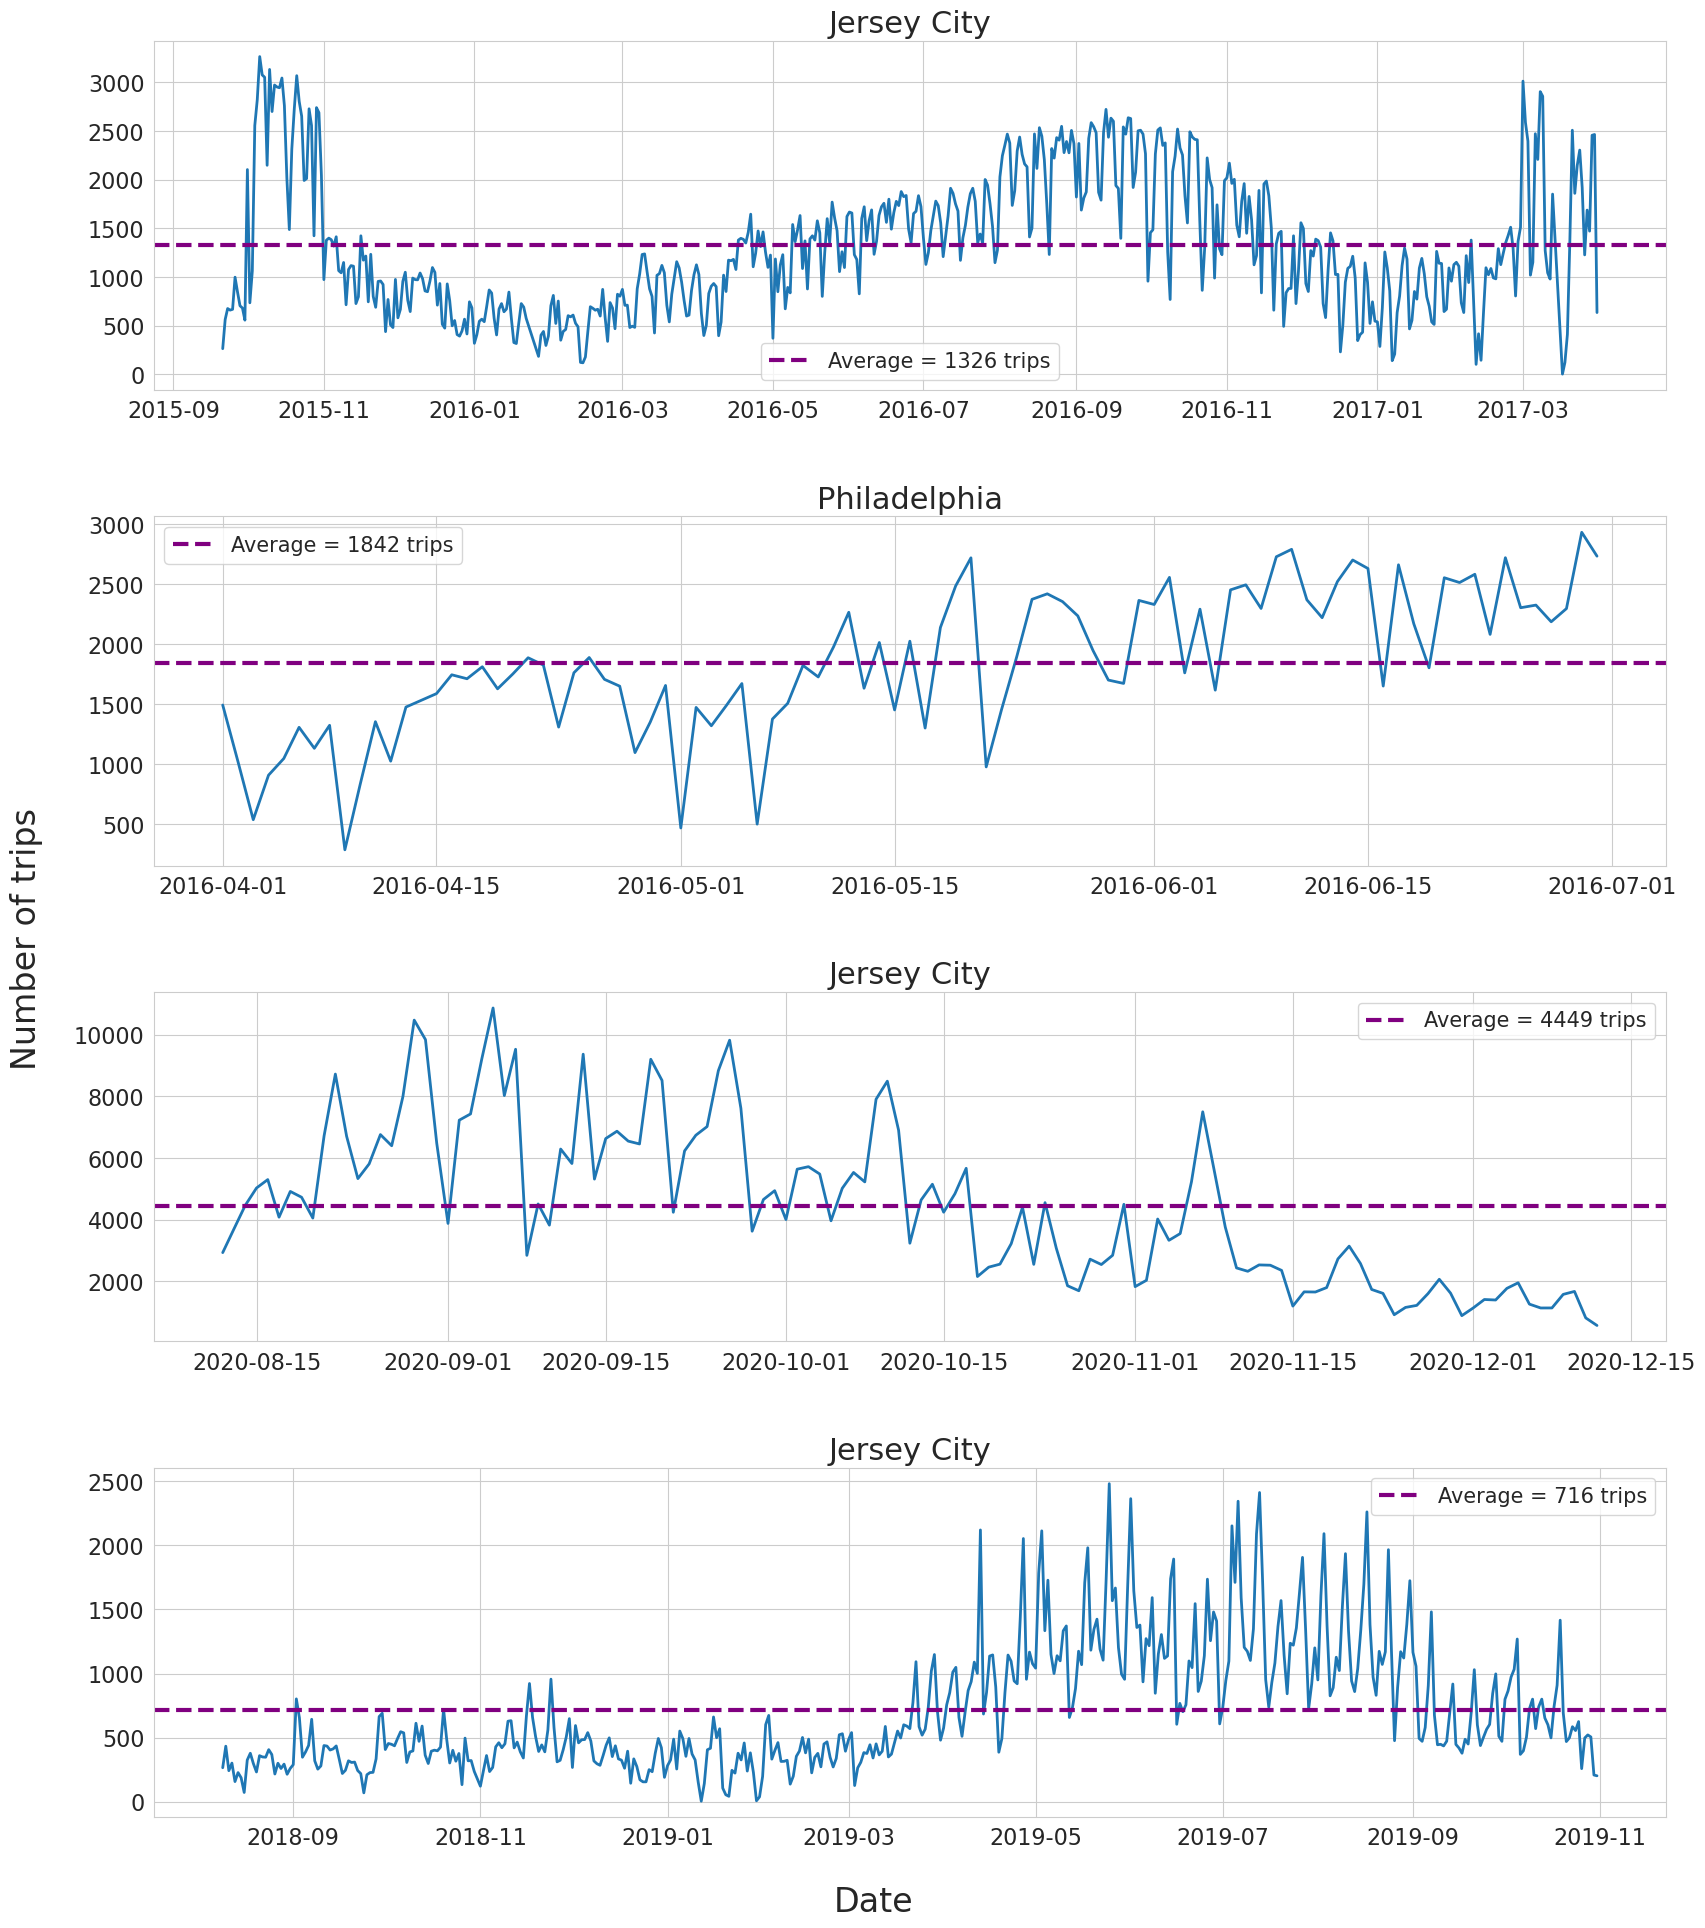

In [5]:
fig, axes = plt.subplots(nrows=4, figsize=(18, 20))
fig.tight_layout(pad = 7.0)
fig.subplots_adjust(left=0.1)
fig.supxlabel("Date", size = 24)
fig.supylabel("Number of trips", size = 24)

for ax, ntd, atpd, name in [[axes[0],ntd_jersey_city,atpd_jersey_city, "Jersey City"],
                            [axes[1],ntd_philadelphia,atpd_philadelphia, "Philadelphia"],
                            [axes[2],ntd_chicago,atpd_chicago, "Jersey City"],
                            [axes[3],ntd_louisville,atpd_louisville, "Jersey City"],]:
    plot = sns.lineplot(x="Date", y="Trips", data=ntd, linewidth=2, ax=ax)
    plot.axhline(atpd, linestyle="--", color="purple", label=f"Average = {atpd} trips", linewidth=3)
    plot.set(xlabel=None, ylabel=None)
    ax.set_title(name, size=22)
    ax.legend(prop={'size': 15})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)

In [6]:
jersey_city["Day Of Week"] = jersey_city["Start Date"].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tdw_jersey_city = jersey_city.groupby("Day Of Week")["Day Of Week"].agg(["count"]).reindex(cats).reset_index()
tdw_jersey_city.columns = ["Day of Week", "Trips"]
atdw_jersey_city = round(tdw_jersey_city["Trips"].mean())

philadelphia["day_of_week"] = philadelphia["start_date"].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tdw_philadelphia = philadelphia.groupby("day_of_week")["day_of_week"].agg(["count"]).reindex(cats).reset_index()
tdw_philadelphia.columns = ["Day of Week", "Trips"]
atdw_philadelphia = round(tdw_philadelphia["Trips"].mean())

chicago["Day of Week"] = chicago["Start Date"].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tdw_chicago = chicago.groupby("Day of Week")["Day of Week"].agg(["count"]).reindex(cats).reset_index()
tdw_chicago.columns = ["Day of Week", "Trips"]
atdw_chicago = round(tdw_chicago["Trips"].mean())

louisville["Day of Week"] = louisville["StartDate"].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tdw_louisville = louisville.groupby("Day of Week")["Day of Week"].agg(["count"]).reindex(cats).reset_index()
tdw_louisville.columns = ["Day of Week", "Trips"]
atdw_louisville = round(tdw_louisville["Trips"].mean())

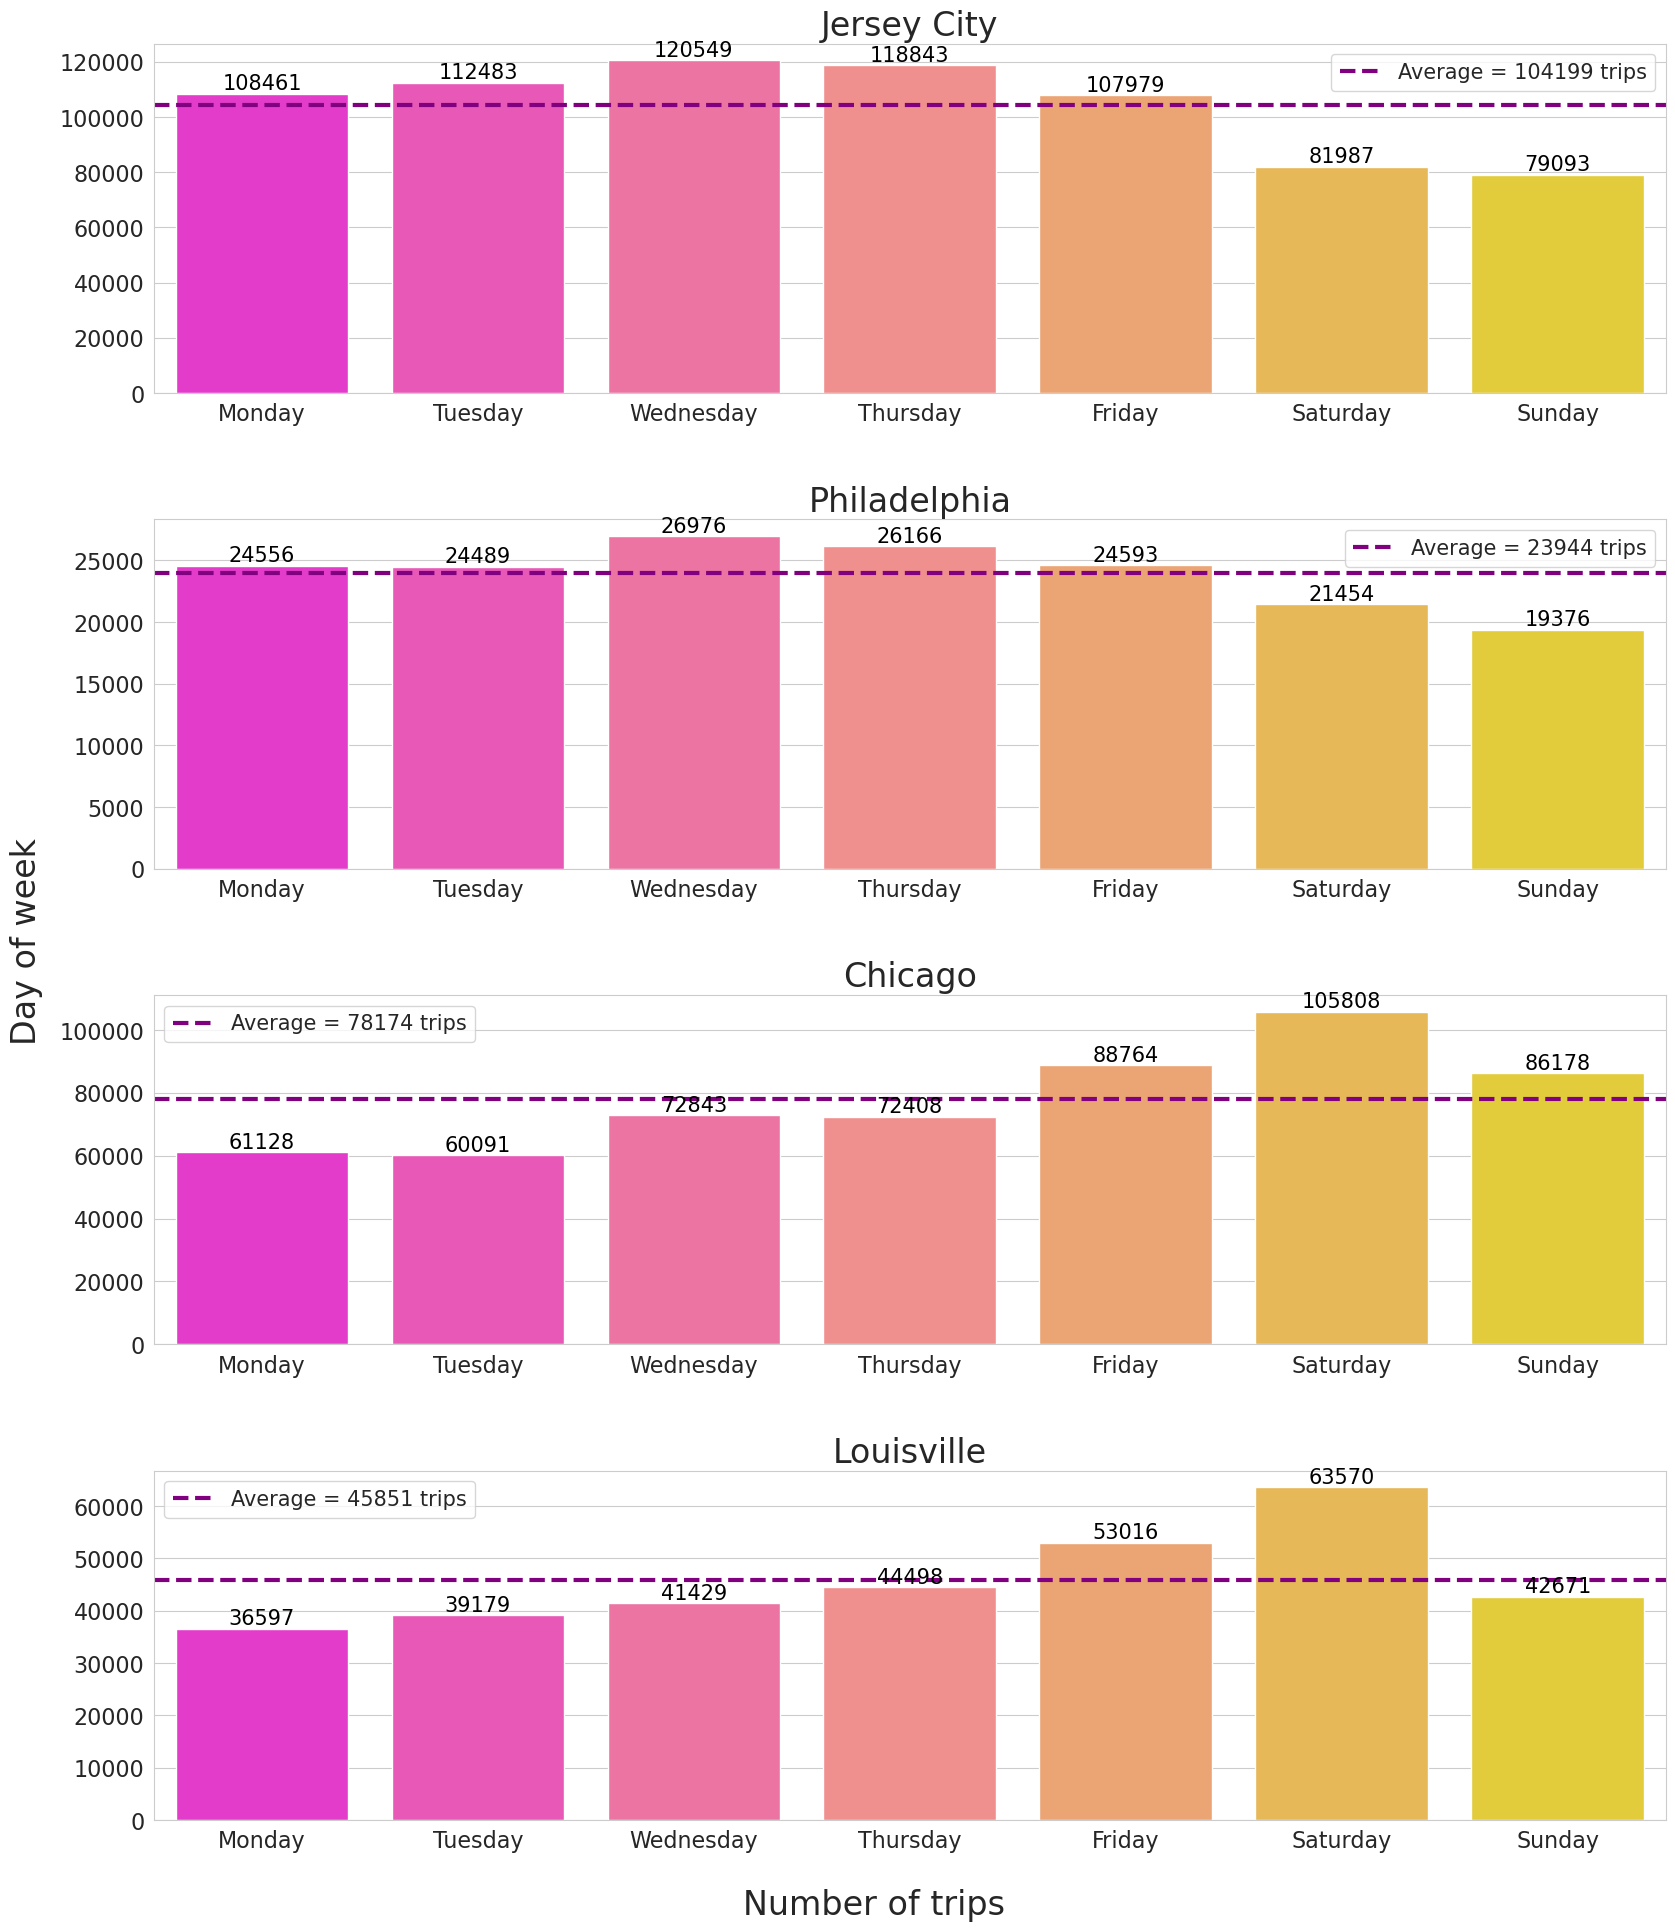

In [7]:
fig, axes = plt.subplots(nrows=4, figsize=(18, 20))
fig.tight_layout(pad = 7.0)
fig.subplots_adjust(left=0.1)
fig.supxlabel("Number of trips", size = 24)
fig.supylabel("Day of week", size = 24)

for ax, tdw, atdw, name in [[axes[0],tdw_jersey_city,atdw_jersey_city, "Jersey City"],
                            [axes[1],tdw_philadelphia,atdw_philadelphia, "Philadelphia"],
                            [axes[2],tdw_chicago,atdw_chicago, "Chicago"],
                            [axes[3],tdw_louisville,atdw_louisville, "Louisville"],]:
    plot = sns.barplot(x="Day of Week", y="Trips", data=tdw, palette="spring", ax=ax)

    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()),
            (p.get_x() + 0.4, p.get_height()), ha='center', va='bottom', color='black', size=15)
    plot.axhline(atdw, linestyle="--", color="purple", label=f"Average = {atdw} trips", linewidth=3)
    plot.set(xlabel=None, ylabel=None)
    ax.set_title(name, size=24)
    ax.legend(prop={'size': 15})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)

In [8]:
jersey_city["Hour"] = pd.to_datetime(jersey_city["Start Time"]).dt.hour
thd_jersey_city = jersey_city["Hour"].value_counts().to_frame().reset_index()
thd_jersey_city.columns = ["Hour", "Trips"]
athd_jersey_city = round(thd_jersey_city["Trips"].mean())

philadelphia["hour"] = pd.to_datetime(philadelphia["start_time"]).dt.hour
thd_philadelphia = philadelphia["hour"].value_counts().to_frame().reset_index()
thd_philadelphia.columns = ["Hour", "Trips"]
athd_philadelphia = round(thd_philadelphia["Trips"].mean())

chicago["Hour"] = pd.to_datetime(chicago["Start Time"]).dt.hour
thd_chicago = chicago["Hour"].value_counts().to_frame().reset_index()
thd_chicago.columns = ["Hour", "Trips"]
athd_chicago = round(thd_chicago["Trips"].mean())

louisville["StartTime"] = np.where(louisville['StartTime'] == '24:00', '00:00', louisville["StartTime"])
louisville["Hour"] = pd.to_datetime(louisville["StartTime"]).dt.hour
thd_louisville = louisville["Hour"].value_counts().to_frame().reset_index()
thd_louisville.columns = ["Hour", "Trips"]
athd_louisville = round(thd_louisville["Trips"].mean())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


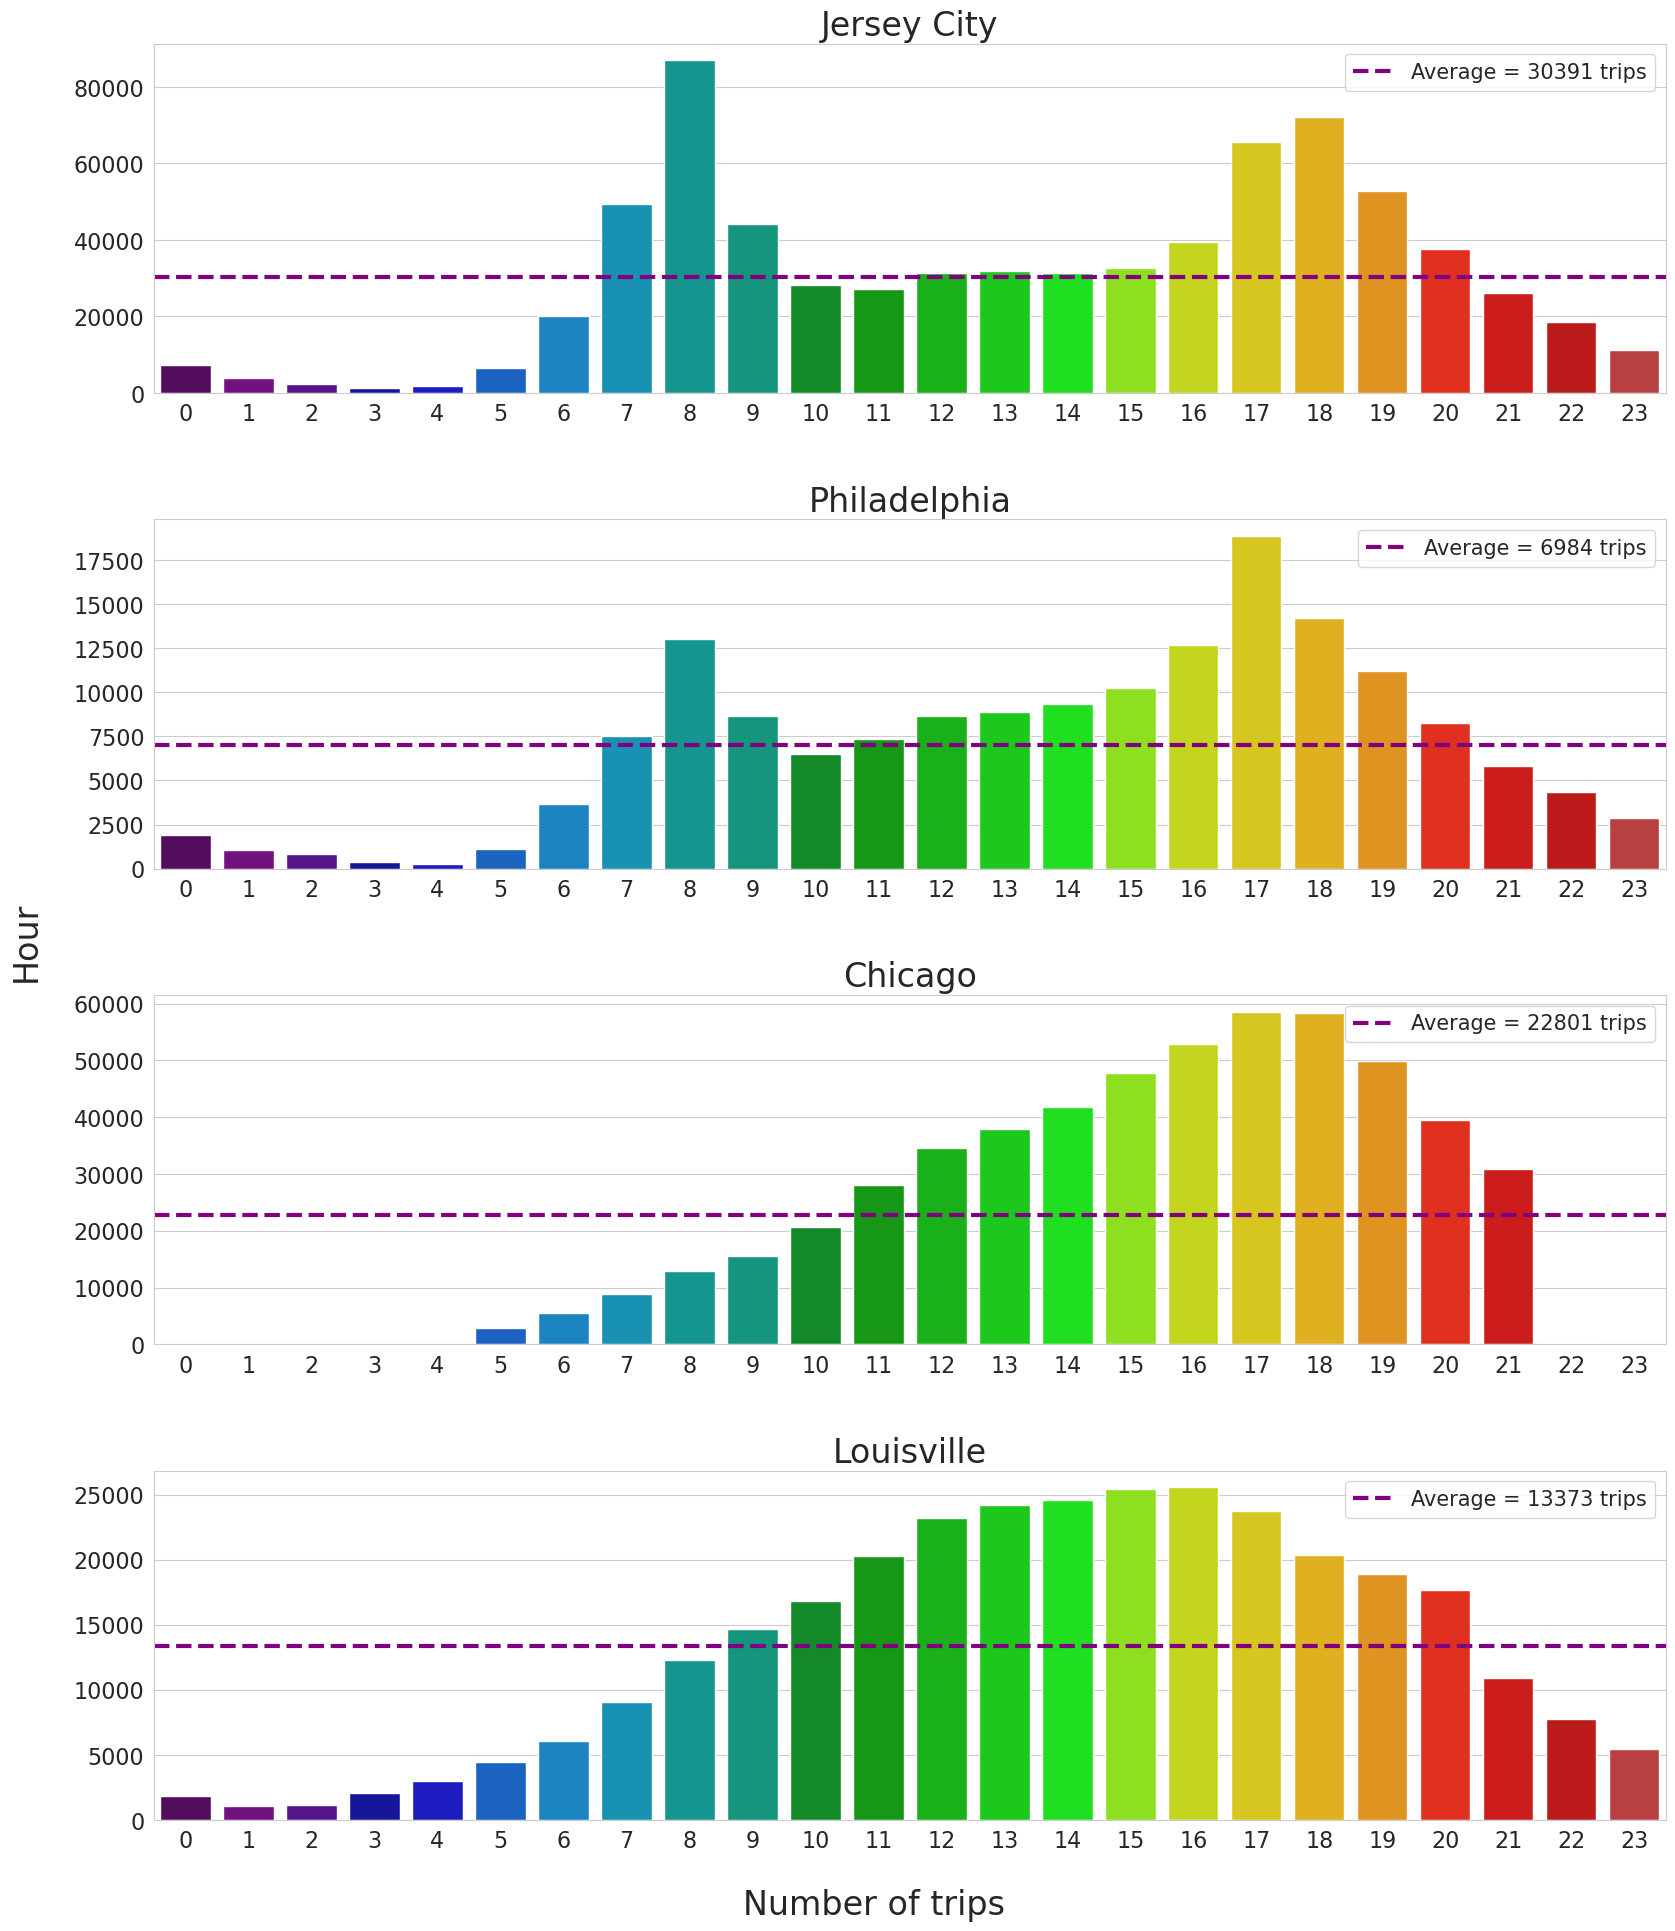

In [9]:
fig, axes = plt.subplots(nrows=4, figsize=(18, 20))
fig.tight_layout(pad = 7.0)
fig.subplots_adjust(left=0.1)
fig.supxlabel("Number of trips", size = 24)
fig.supylabel("Hour", size = 24)

for ax, thd, athd, name in [[axes[0],thd_jersey_city,athd_jersey_city, "Jersey City"],
                            [axes[1],thd_philadelphia,athd_philadelphia, "Philadelphia"],
                            [axes[2],thd_chicago,athd_chicago, "Chicago"],
                            [axes[3],thd_louisville,athd_louisville, "Louisville"]]:

    plot = sns.barplot(x="Hour", y="Trips", data=thd, palette="nipy_spectral", ax=ax)
    plot.axhline(athd, linestyle="--", color="purple", label=f"Average = {athd} trips", linewidth=3)
    plt.title(name, size=24)
    plt.legend(prop={'size': 15})
    plot.set(xlabel=None, ylabel=None)
    ax.set_title(name, size=24)
    ax.legend(prop={'size': 15})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)

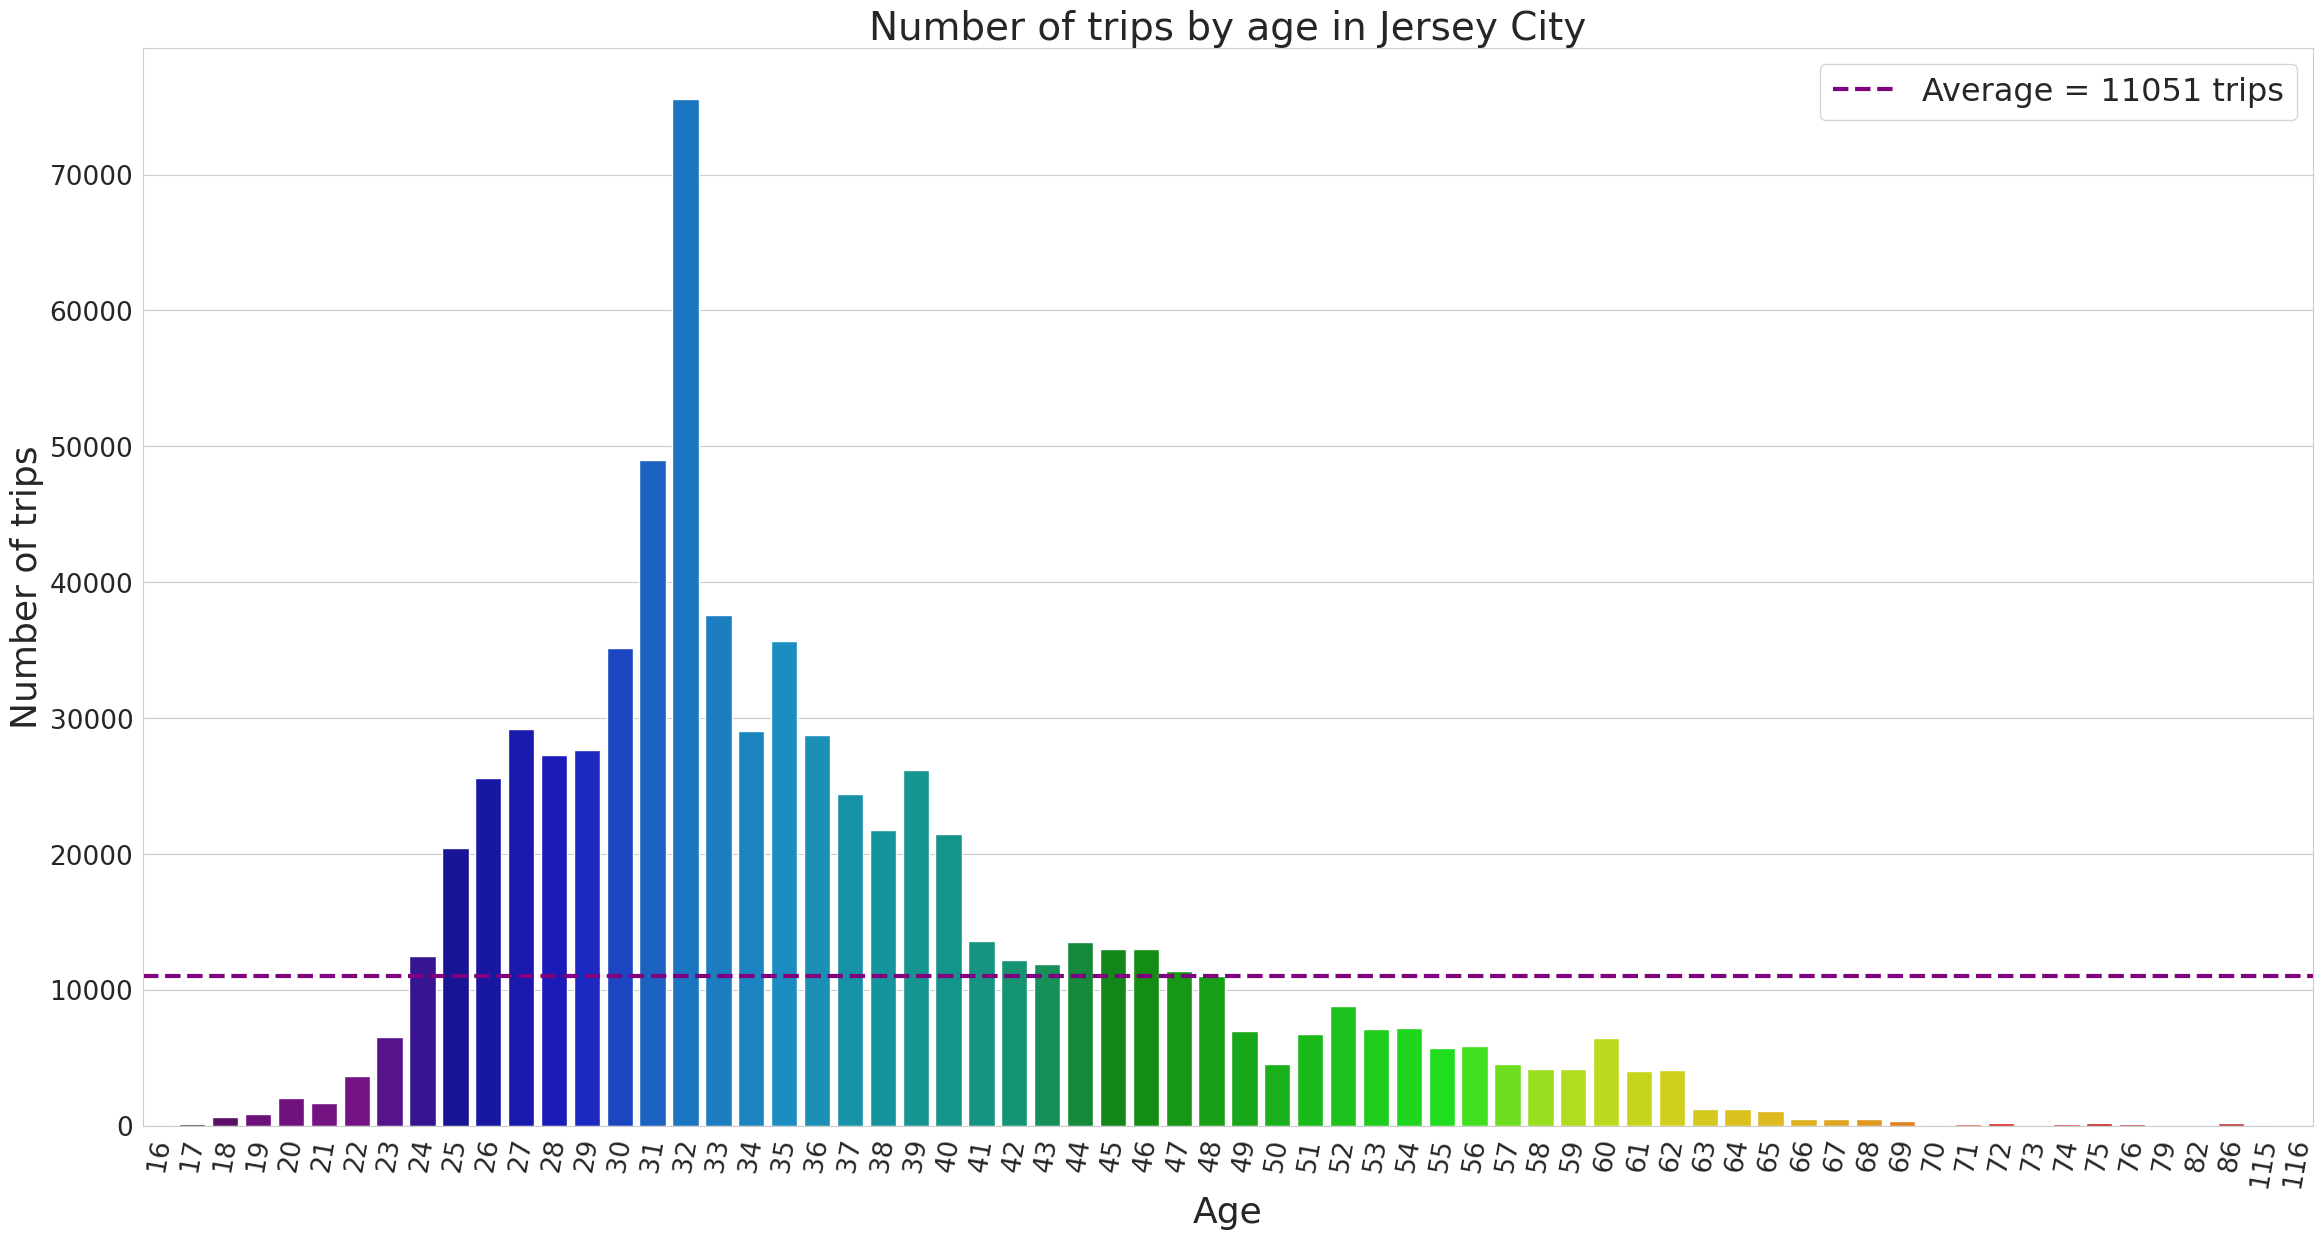

In [10]:
jersey_city['Age'] = pd.to_datetime(jersey_city['Start Time']).dt.year - jersey_city['Birth Year'].astype('int')
tba_jersey_city = jersey_city["Age"].value_counts().to_frame().reset_index()
tba_jersey_city.columns = ["Age", "Trips"]
athba_jersey_city = round(tba_jersey_city["Trips"].mean())
plt.figure(figsize=(28, 14))
plot = sns.barplot(x="Age", y="Trips", data=tba_jersey_city, palette="nipy_spectral")
plot.axhline(athba_jersey_city, linestyle="--", color="purple", label=f"Average = {athba_jersey_city} trips", linewidth=3)
plt.title("Number of trips by age in Jersey City", size=28)
plt.xlabel("Age", size=26)
plt.ylabel("Number of trips", size=26)
plt.legend(prop={'size': 23})
plt.xticks(size=19, rotation=80)
plt.yticks(size=19)
plt.show()

In [11]:
jersey_city["Gender"] = np.where(jersey_city['Gender'] == 0, 'Female', 'Male')
tbg_jersey_city = jersey_city["Gender"].value_counts().to_frame().reset_index()
tbg_jersey_city.columns = ["Gender", "Trips"]
athbg_jersey_city = round(tbg_jersey_city["Trips"].mean())

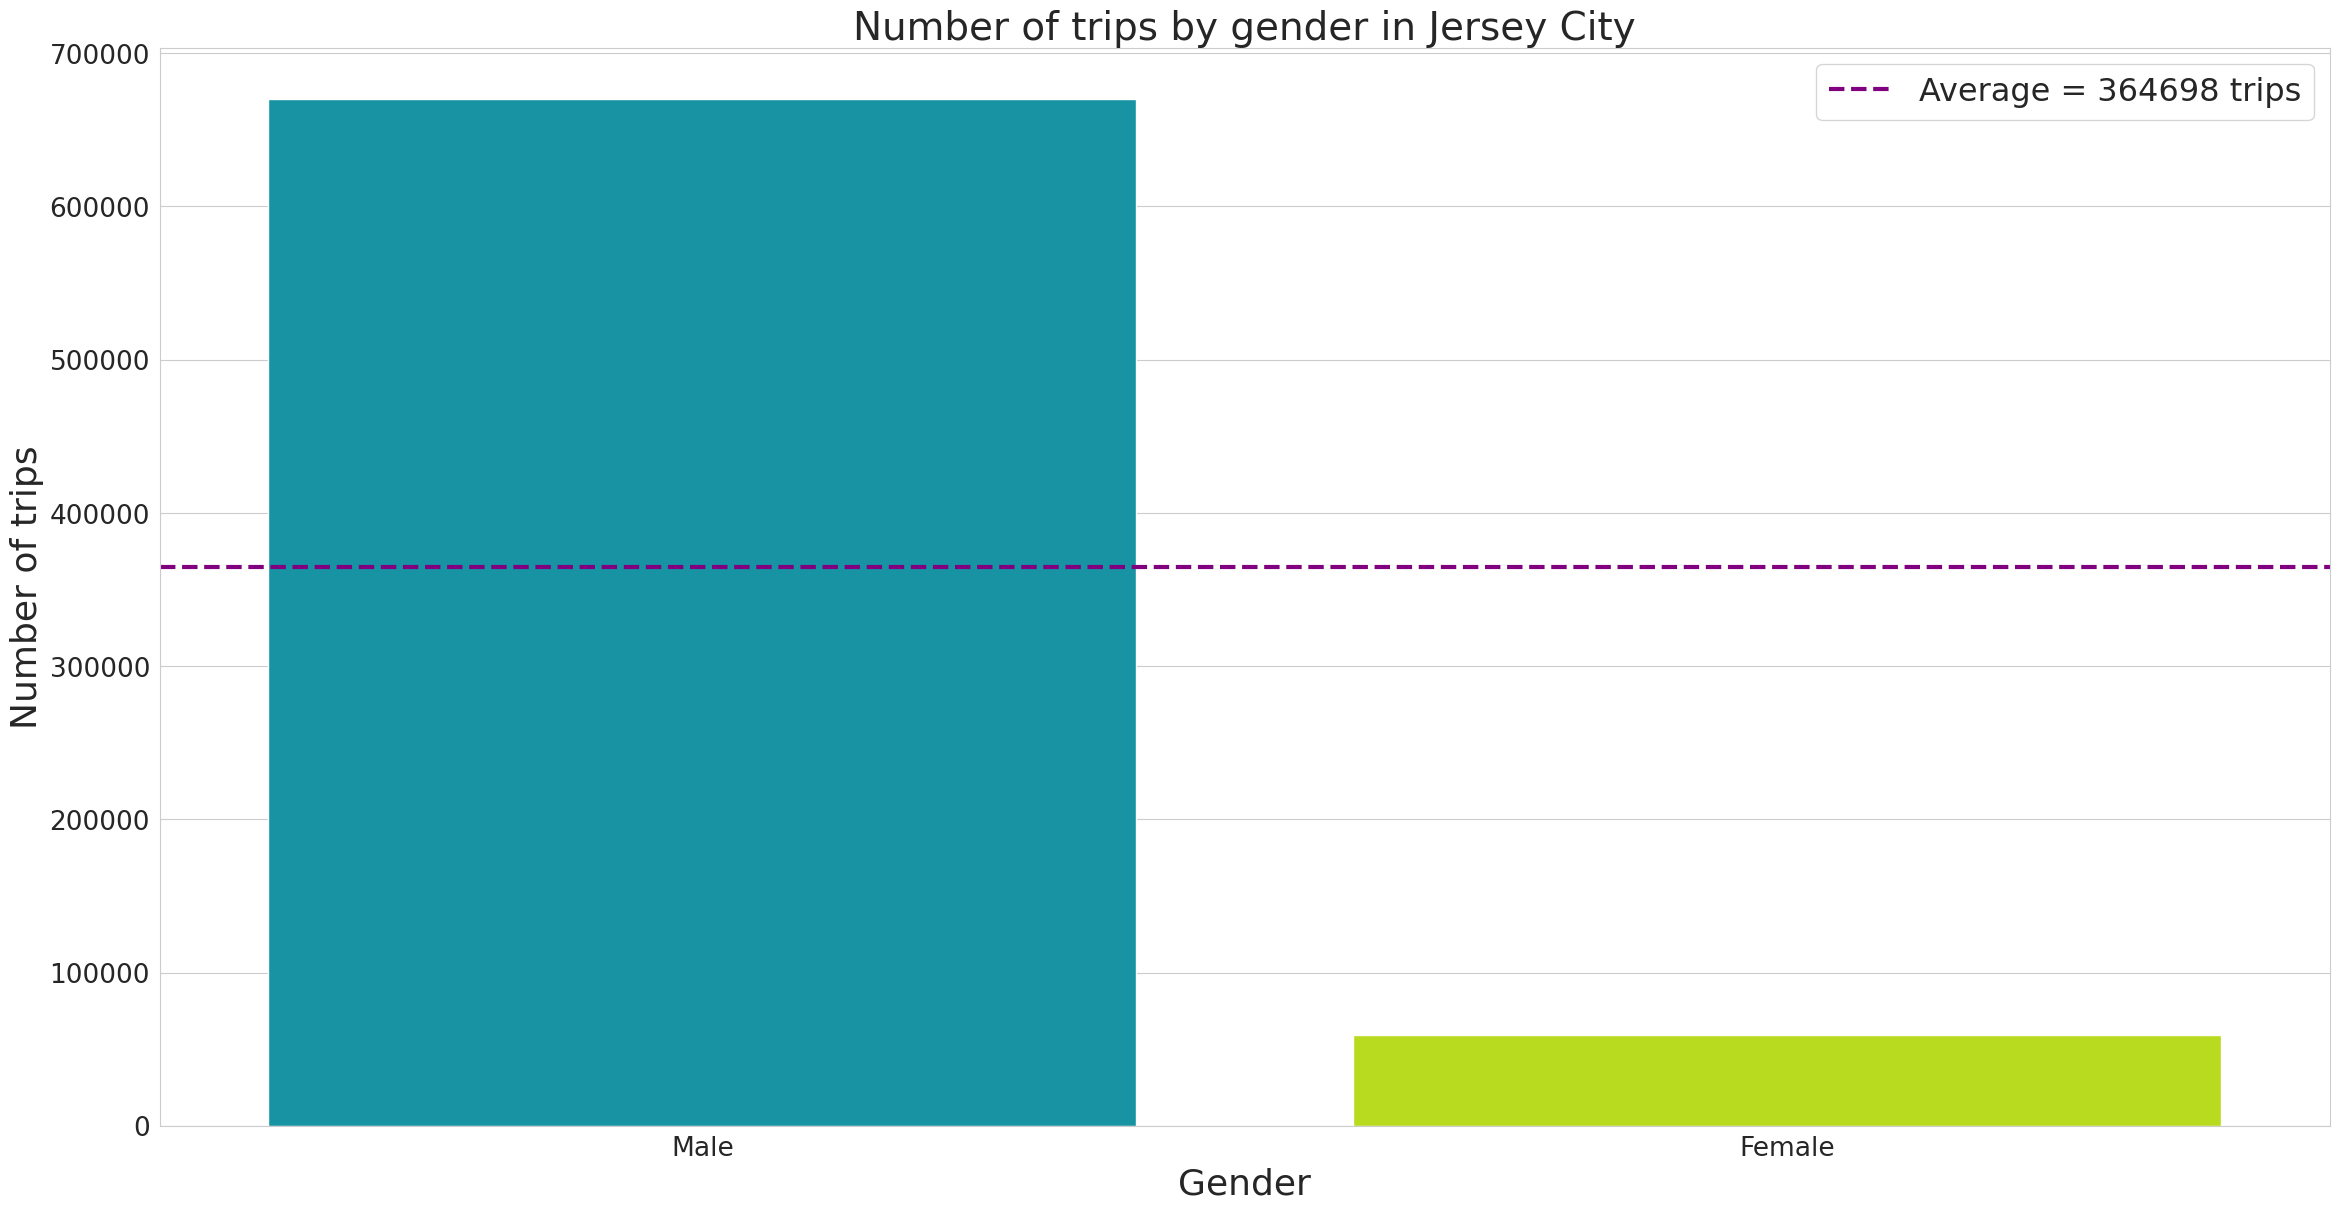

In [12]:
plt.figure(figsize=(28, 14))
plot = sns.barplot(x="Gender", y="Trips", data=tbg_jersey_city, palette="nipy_spectral")
plot.axhline(athbg_jersey_city, linestyle="--", color="purple", label=f"Average = {athbg_jersey_city} trips", linewidth=3)
plt.title("Number of trips by gender in Jersey City", size=28)
plt.xlabel("Gender", size=26)
plt.ylabel("Number of trips", size=26)
plt.legend(prop={'size': 23})
plt.xticks(size=19)
plt.yticks(size=19)
plt.show()

In [13]:
louisville.head()

,TripID,StartDate,StartTime,EndDate,EndTime,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum,Day of Week,Hour
2,00006088-2579-e0d0-6a30-a15bb878,2019-08-21,17:30,2019-08-21,17:30,6.0,0.330,38.264,-85.728,38.261,-85.730,4,17,Wednesday,17
3,00008c1a-899b-8596-970f-9f6bf495,2019-07-03,11:00,2019-07-03,11:15,6.0,0.640,38.217,-85.757,38.221,-85.763,4,11,Wednesday,11
4,000096c8-bac3-4d6f-7ebb-30b957ee,2019-05-04,21:15,2019-05-04,21:30,7.0,0.684,38.221,-85.762,38.223,-85.764,7,21,Saturday,21
6,0000f36b-a0c7-0378-3f34-e0fb80f6,2019-05-07,17:30,2019-05-07,18:00,32.0,1.740,38.257,-85.706,38.259,-85.696,3,17,Tuesday,17
7,00011cdb-4801-1ce5-a15d-6b9a539a,2019-06-09,13:30,2019-06-09,13:45,10.0,0.808,38.251,-85.758,38.257,-85.760,1,13,Sunday,13


In [14]:
avd_jersey_city = round(jersey_city["Trip_Duration_in_min"].mean(), 2)
atdbd_jersey_city = jersey_city.groupby(["Start Date"]).agg({"Trip_Duration_in_min": "mean"}).reset_index()
atdbd_jersey_city["Trip_Duration_in_min"] = round(atdbd_jersey_city["Trip_Duration_in_min"],2)
atdbd_jersey_city.columns = ["Date", "Trip Duration"]

philadelphia["trip_duration_in_min"] = philadelphia["duration"]/60
avd_philadelphia = round(philadelphia["trip_duration_in_min"].mean(), 2)
atdbd_philadelphia = philadelphia.groupby(["start_date"]).agg({"trip_duration_in_min": "mean"}).reset_index()
atdbd_philadelphia["trip_duration_in_min"] = round(atdbd_philadelphia["trip_duration_in_min"],2)
atdbd_philadelphia.columns = ["Date", "Trip Duration"]

avd_chicago = round(chicago["Trip Duration"].mean(), 2)
atdbd_chicago = chicago.groupby(["Start Time"]).agg({"Trip Duration": "mean"}).reset_index()
atdbd_chicago["Trip Duration"] = round(atdbd_chicago["Trip Duration"],2)
atdbd_chicago["Start Time"] = pd.to_datetime(atdbd_chicago["Start Time"]).dt.date
atdbd_chicago.columns = ["Date", "Trip Duration"]

avd_louisville = round(louisville["TripDuration"].mean(), 2)
louisville.head()
louisville["Start DateTime"] = pd.to_datetime(louisville['StartDate'].astype(str) + ' ' + louisville["StartTime"].astype(str))
atdbd_louisville = louisville.groupby(["Start DateTime"]).agg({"TripDuration": "mean"}).reset_index()
atdbd_louisville["TripDuration"] = round(atdbd_louisville["TripDuration"],2)
atdbd_louisville["Start DateTime"] = pd.to_datetime(atdbd_louisville["Start DateTime"]).dt.date
atdbd_louisville.columns = ["Date", "Trip Duration"]

In [15]:
louisville.head()

,TripID,StartDate,StartTime,EndDate,EndTime,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum,Day of Week,Hour,Start DateTime
2,00006088-2579-e0d0-6a30-a15bb878,2019-08-21,17:30,2019-08-21,17:30,6.0,0.330,38.264,-85.728,38.261,-85.730,4,17,Wednesday,17,2019-08-21 17:30:00
3,00008c1a-899b-8596-970f-9f6bf495,2019-07-03,11:00,2019-07-03,11:15,6.0,0.640,38.217,-85.757,38.221,-85.763,4,11,Wednesday,11,2019-07-03 11:00:00
4,000096c8-bac3-4d6f-7ebb-30b957ee,2019-05-04,21:15,2019-05-04,21:30,7.0,0.684,38.221,-85.762,38.223,-85.764,7,21,Saturday,21,2019-05-04 21:15:00
6,0000f36b-a0c7-0378-3f34-e0fb80f6,2019-05-07,17:30,2019-05-07,18:00,32.0,1.740,38.257,-85.706,38.259,-85.696,3,17,Tuesday,17,2019-05-07 17:30:00
7,00011cdb-4801-1ce5-a15d-6b9a539a,2019-06-09,13:30,2019-06-09,13:45,10.0,0.808,38.251,-85.758,38.257,-85.760,1,13,Sunday,13,2019-06-09 13:30:00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


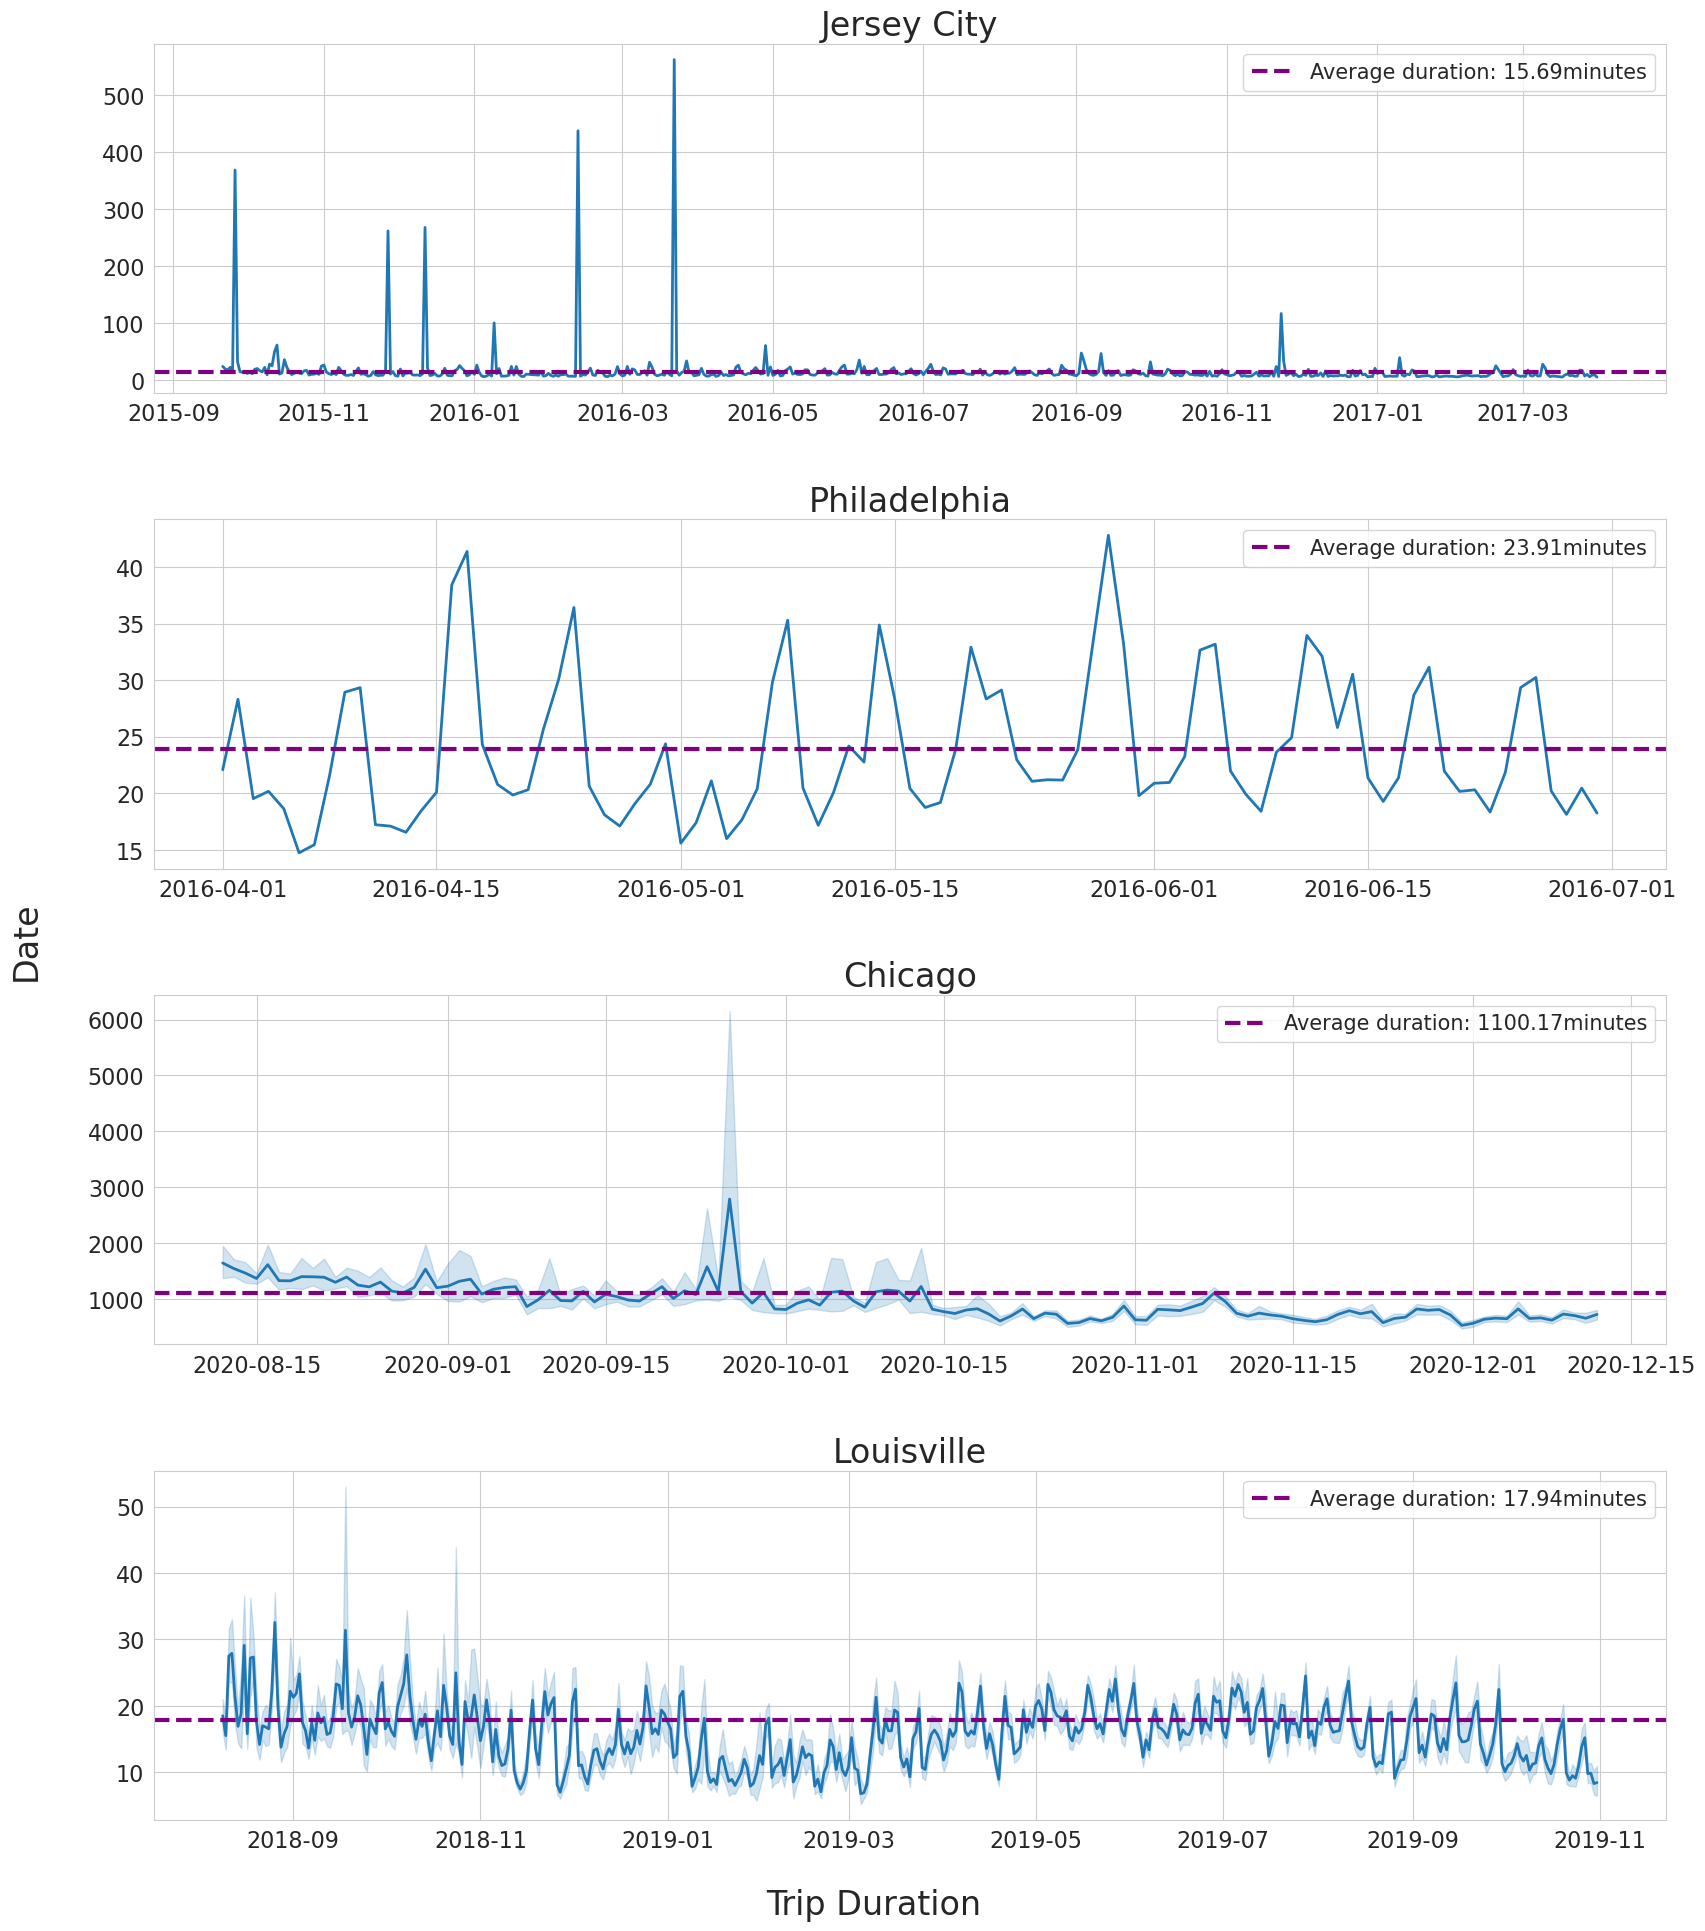

In [16]:
fig, axes = plt.subplots(nrows=4, figsize=(18, 20))
fig.tight_layout(pad = 7.0)
fig.subplots_adjust(left=0.1)
fig.supxlabel("Trip Duration", size = 24)
fig.supylabel("Date", size = 24)

for ax, avd, atdbd, name in [[axes[0],avd_jersey_city,atdbd_jersey_city, "Jersey City"],
                            [axes[1],avd_philadelphia,atdbd_philadelphia, "Philadelphia"],
                            [axes[2],avd_chicago,atdbd_chicago, "Chicago"],
                            [axes[3],avd_louisville,atdbd_louisville, "Louisville"]]:


    plot = sns.lineplot(x="Date", y="Trip Duration", data=atdbd, linewidth=2, ax=ax)
    plot.axhline(avd, linestyle="--", color="purple", label=f"Average duration: {avd}minutes", linewidth=3)
    plt.title(name, size=24)
    plt.legend(prop={'size': 15})
    plot.set(xlabel=None, ylabel=None)
    ax.set_title(name, size=24)
    ax.legend(prop={'size': 15})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)


In [17]:
adbd_jersey_city = jersey_city.groupby(["Day Of Week"]).agg({"Trip_Duration_in_min": "mean"})
adbd_jersey_city.columns = ["Average Trip Duration"]
adbd_jersey_city["Average Trip Duration"] = round(adbd_jersey_city["Average Trip Duration"],2)
adbd_jersey_city = adbd_jersey_city.reset_index()

adbd_philadelphia = philadelphia.groupby(["day_of_week"]).agg({"trip_duration_in_min": "mean"}).reset_index()
adbd_philadelphia.columns = ["Day Of Week", "Average Trip Duration"]
adbd_philadelphia["Average Trip Duration"] = round(adbd_philadelphia["Average Trip Duration"],2)

adbd_chicago = chicago.groupby(["Day of Week"]).agg({"Trip Duration": "mean"})
adbd_chicago = adbd_chicago.reset_index()
adbd_chicago.columns = ["Day Of Week", "Average Trip Duration"]
adbd_chicago["Average Trip Duration"] = round(adbd_chicago["Average Trip Duration"],2)
adbd_chicago.head()

adbd_louisville = louisville.groupby(["DayOfWeek"]).agg({"TripDuration": "mean"})
adbd_louisville = adbd_louisville.reset_index()
adbd_louisville.columns = ["Day Of Week", "Average Trip Duration"]
adbd_louisville["Average Trip Duration"] = round(adbd_louisville["Average Trip Duration"],2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


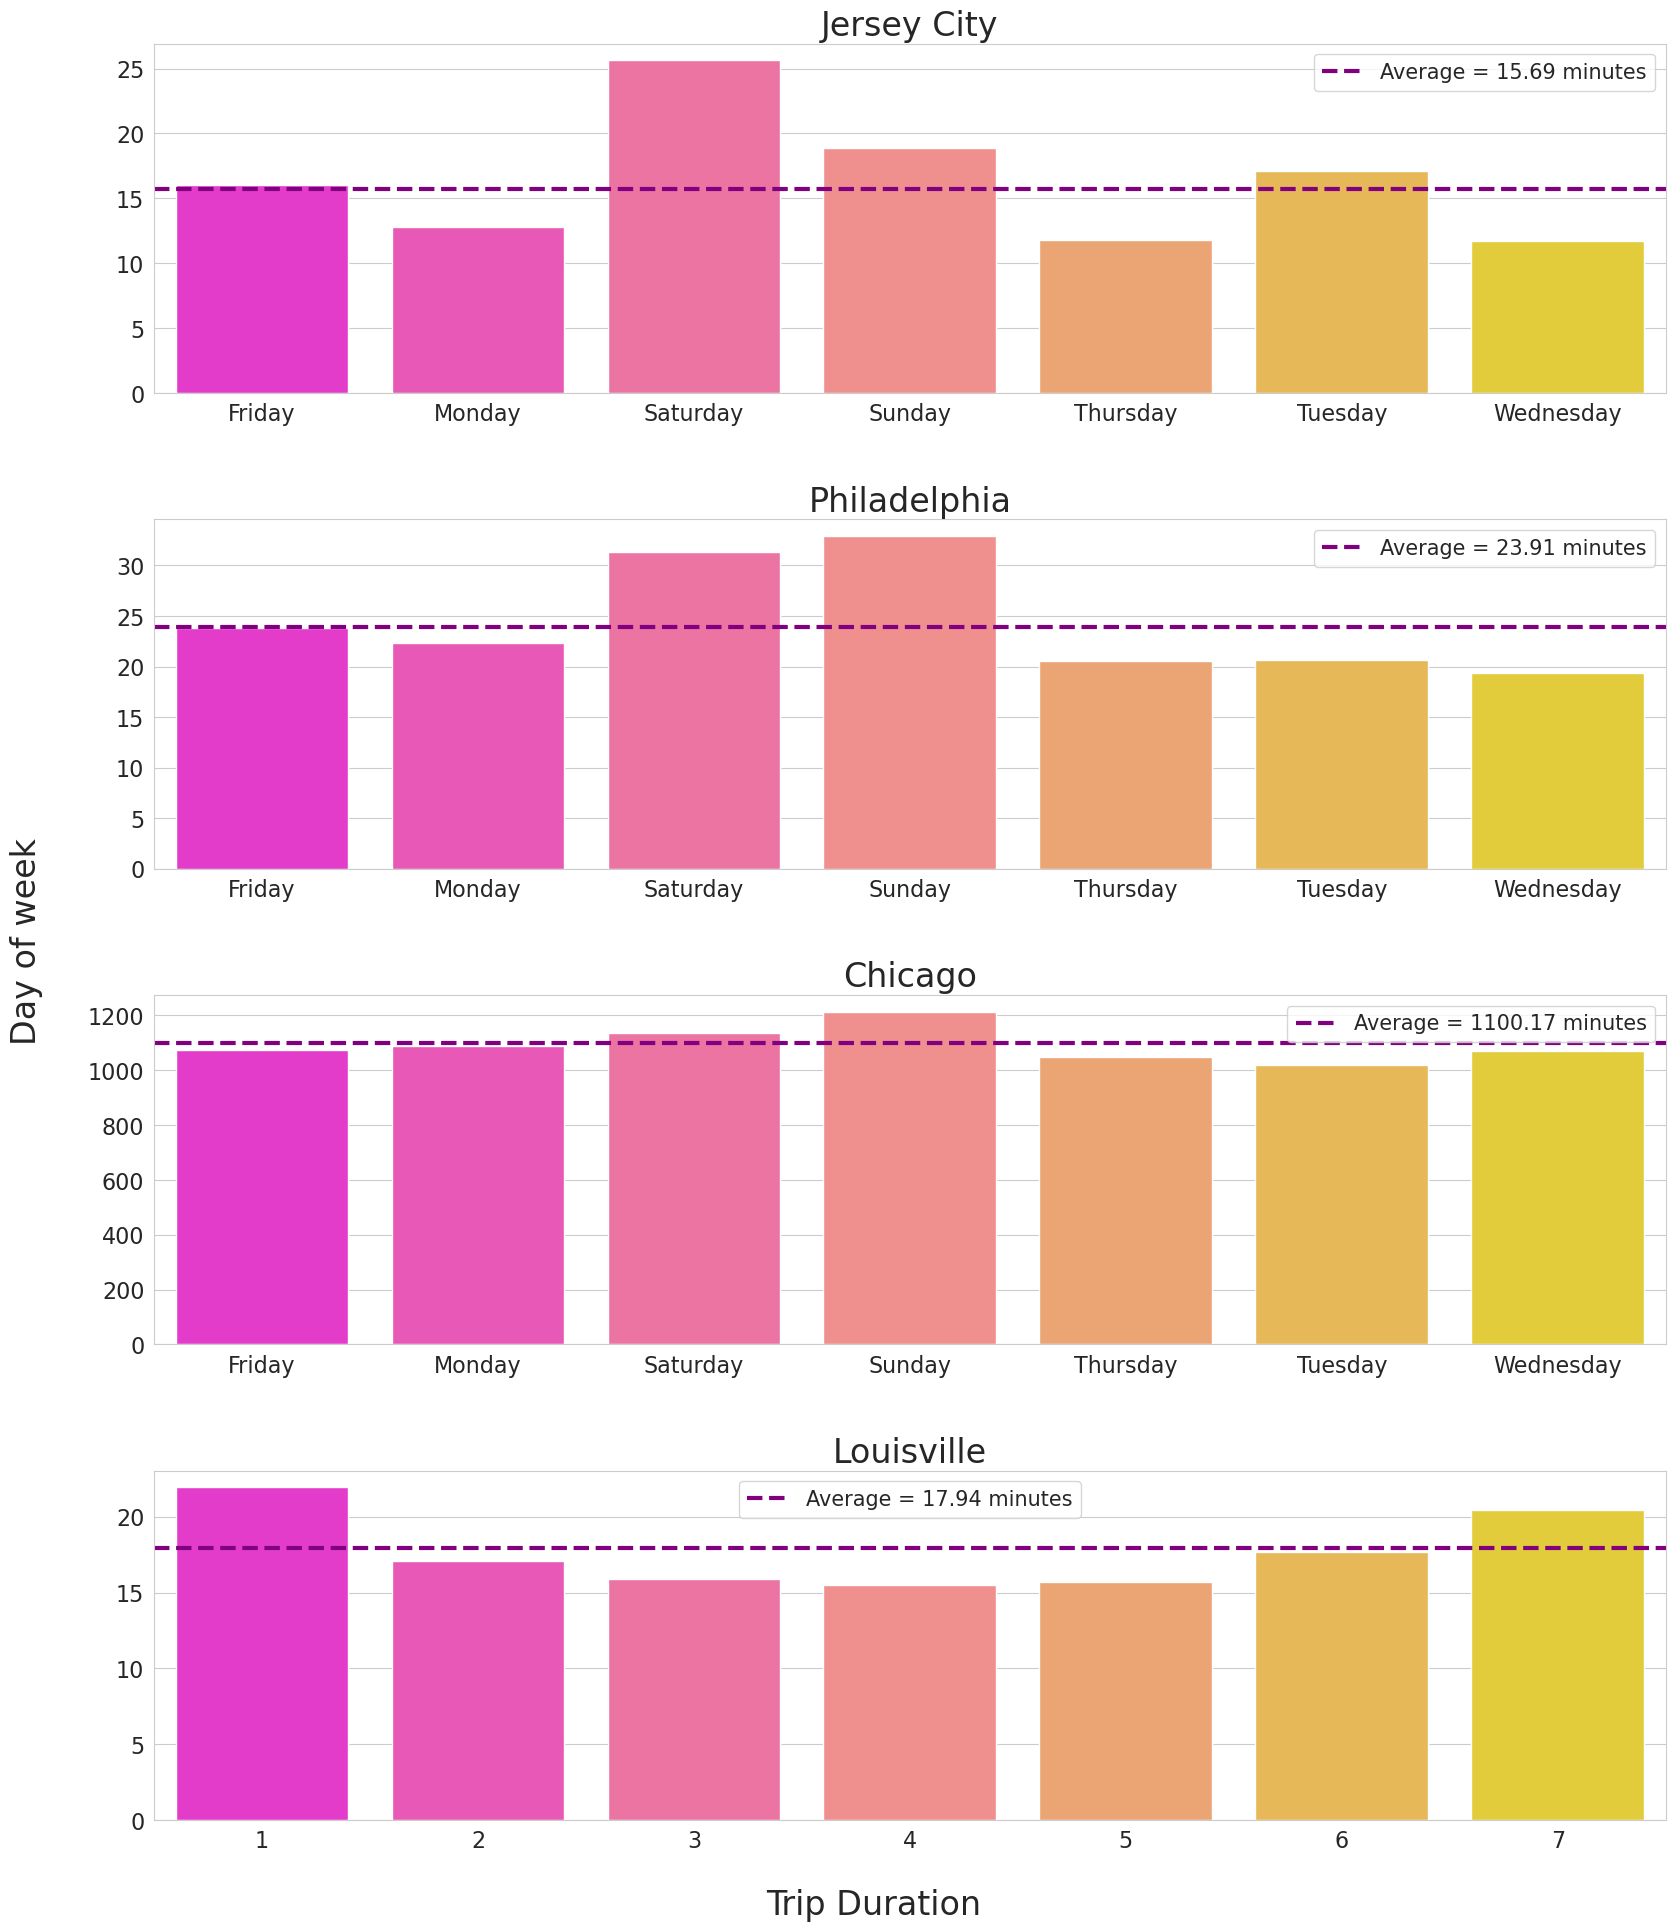

In [18]:
fig, axes = plt.subplots(nrows=4, figsize=(18, 20))
fig.tight_layout(pad = 7.0)
fig.subplots_adjust(left=0.1)
fig.supxlabel("Trip Duration", size = 24)
fig.supylabel("Day of week", size = 24)

for ax, avd, adbd, name in [[axes[0],avd_jersey_city,adbd_jersey_city, "Jersey City"],
                            [axes[1],avd_philadelphia,adbd_philadelphia, "Philadelphia"],
                            [axes[2],avd_chicago, adbd_chicago, "Chicago"],
                            [axes[3],avd_louisville,adbd_louisville, "Louisville"]]:


    plot = sns.barplot(x="Day Of Week", y="Average Trip Duration", data=adbd, palette="spring", ax=ax)
    plot.axhline(avd, linestyle="--", color="purple", label=f"Average = {avd} minutes", linewidth=3)
    plt.title(name, size=24)
    plt.legend(prop={'size': 15})
    plot.set(xlabel=None, ylabel=None)
    ax.set_title(name, size=24)
    ax.legend(prop={'size': 15})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)

In [19]:
adbh_jersey_city = jersey_city.groupby(["Hour"]).agg({"Trip_Duration_in_min": "mean"})
adbh_jersey_city.columns = ["Average Trip Duration"]
adbh_jersey_city["Average Trip Duration"] = round(adbh_jersey_city["Average Trip Duration"],2)
adbh_jersey_city = adbh_jersey_city.reset_index()

adbh_philadelphia = philadelphia.groupby(["hour"]).agg({"trip_duration_in_min": "mean"}).reset_index()
adbh_philadelphia.columns = ["Hour", "Average Trip Duration"]
adbh_philadelphia["Average Trip Duration"] = round(adbh_philadelphia["Average Trip Duration"],2)

adbh_chicago = chicago.groupby(["Hour"]).agg({"Trip Duration": "mean"})
adbh_chicago.columns = ["Average Trip Duration"]
adbh_chicago["Average Trip Duration"] = round(adbh_chicago["Average Trip Duration"],2)
adbh_chicago = adbh_chicago.reset_index()

adbh_louisville = louisville.groupby(["HourNum"]).agg({"TripDuration": "mean"}).reset_index()
adbh_louisville.columns = ["Hour", "Average Trip Duration"]
adbh_louisville["Average Trip Duration"] = round(adbh_louisville["Average Trip Duration"],2)
adbh_louisville = adbh_louisville.reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


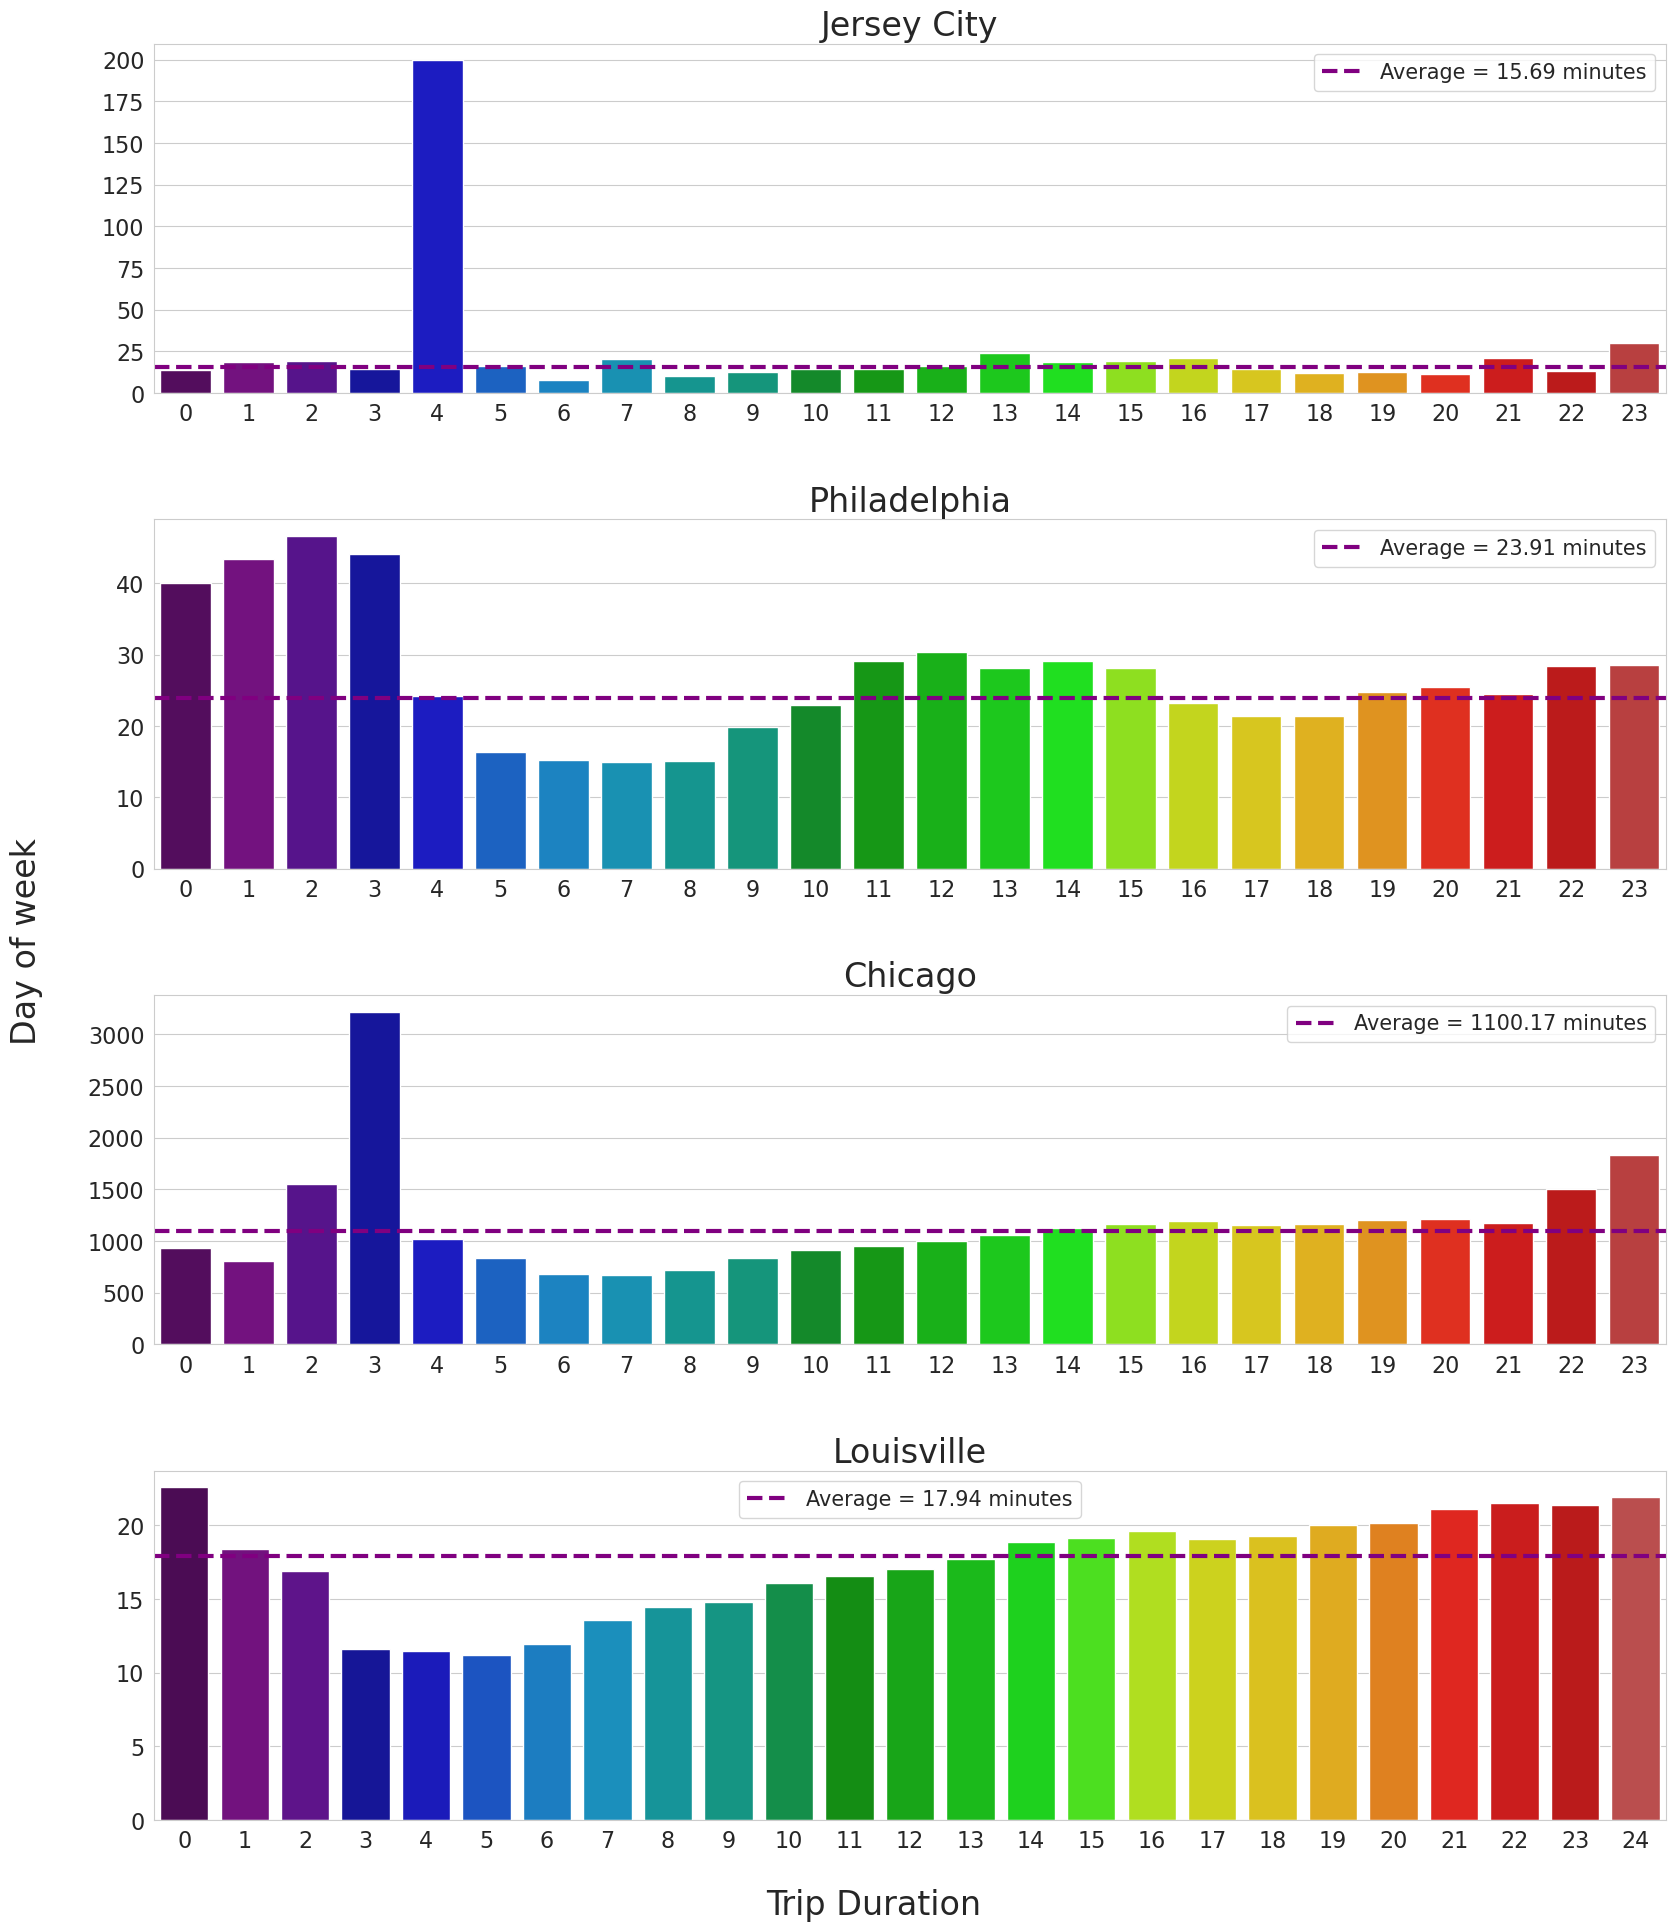

In [20]:
fig, axes = plt.subplots(nrows=4, figsize=(18, 20))
fig.tight_layout(pad = 7.0)
fig.subplots_adjust(left=0.1)
fig.supxlabel("Trip Duration", size = 24)
fig.supylabel("Day of week", size = 24)

for ax, avd, adbh, name in [[axes[0],avd_jersey_city,adbh_jersey_city, "Jersey City"],
                            [axes[1],avd_philadelphia,adbh_philadelphia, "Philadelphia"],
                            [axes[2],avd_chicago, adbh_chicago, "Chicago"],
                            [axes[3],avd_louisville,adbh_louisville, "Louisville"]]:


    plot = sns.barplot(x="Hour", y="Average Trip Duration", data=adbh, palette="nipy_spectral", ax=ax)
    plot.axhline(avd, linestyle="--", color="purple", label=f"Average = {avd} minutes", linewidth=3)
    plt.title(name, size=24)
    plt.legend(prop={'size': 15})
    plot.set(xlabel=None, ylabel=None)
    ax.set_title(name, size=24)
    ax.legend(prop={'size': 15})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)


In [21]:
ftd_jersey_city = jersey_city[(jersey_city["Start Date"] >= "2015-09-21") & (jersey_city["Start Date"] <= "2015-10-4")]
ftd_jersey_city["Time Period"] = "First 15 Days"
ltd_jersey_city = jersey_city[(jersey_city["Start Date"] >= "2017-03-18") & (jersey_city["Start Date"] <= "2017-03-31")]
ltd_jersey_city["Time Period"] = "Last 15 Days"
fltd_jersey_city = pd.concat([ftd_jersey_city, ltd_jersey_city])
fl_15_jersey_city = fltd_jersey_city.groupby("Time Period").agg({"Time Period": "count",
                                         "Trip_Duration_in_min": "mean"})
fl_15_jersey_city.columns = ["Trips", "Trips Duration"]
fl_15_jersey_city["Trips Duration"] = round(fl_15_jersey_city["Trips Duration"], 2)
fl_15_jersey_city = fl_15_jersey_city.reset_index()
fltdg_jersey_city = fltd_jersey_city.groupby(["Day Of Week", "Time Period"]).agg({"Time Period": "count",
                                                          "Trip_Duration_in_min": "mean"})
fltdg_jersey_city["Trip_Duration_in_min"] = round(fltdg_jersey_city["Trip_Duration_in_min"],2)
fltdg_jersey_city.columns = ["Trips", "Trips Duration"]
fltdg_jersey_city = fltdg_jersey_city.reset_index()


ftd_philadelphia = philadelphia[(philadelphia["start_date"] >= "2016-04-01") & (philadelphia["start_date"] <= "2016-04-14")]
ftd_philadelphia["Time Period"] = "First 15 Days"
ltd_philadelphia = philadelphia[(philadelphia["start_date"] >= "2016-06-17") & (philadelphia["start_date"] <= "2016-06-30")]
ltd_philadelphia["Time Period"] = "Last 15 Days"
fltd_philadelphia = pd.concat([ftd_philadelphia, ltd_philadelphia])
fl_15_philadelphia = fltd_philadelphia.groupby("Time Period").agg({"Time Period": "count",
                                         "trip_duration_in_min": "mean"})
fl_15_philadelphia.columns = ["Trips", "Trips Duration"]
fl_15_philadelphia["Trips Duration"] = round(fl_15_philadelphia["Trips Duration"], 2)
fl_15_philadelphia = fl_15_philadelphia.reset_index()
fltdg_philadelphia = fltd_philadelphia.groupby(["day_of_week", "Time Period"]).agg({"Time Period": "count",
                                                          "trip_duration_in_min": "mean"})
fltdg_philadelphia["trip_duration_in_min"] = round(fltdg_philadelphia["trip_duration_in_min"],2)
fltdg_philadelphia.columns = ["Trips", "Trips Duration"]
fltdg_philadelphia = fltdg_philadelphia.reset_index()
fltdg_philadelphia.columns = ["Day Of Week","Time Period","Trips", "Trips Duration"]


ftd_chicago = chicago[(chicago["Start Date"] >= "2020-08-12") & (chicago["Start Date"] <= "2020-08-26")]
ftd_chicago["Time Period"] = "First 15 Days"
ltd_chicago = chicago[(chicago["Start Date"] >= "2020-11-12") & (chicago["Start Date"] <= "2020-11-26")]
ltd_chicago["Time Period"] = "Last 15 Days"
fltd_chicago = pd.concat([ftd_chicago, ltd_chicago])
fl_15_chicago = fltd_chicago.groupby("Time Period").agg({"Time Period": "count",
                                         "Trip Distance": "mean",
                                         "Trip Duration": "mean"})
fl_15_chicago.columns = ["Trips", "Trips Distance", "Trips Duration"]
fl_15_chicago = fl_15_chicago.reset_index()
fltdg_chicago = fltd_chicago.groupby(["Day of Week", "Time Period"]).agg({"Time Period": "count",
                                                          "Trip Distance": "mean",
                                                          "Trip Duration": "mean"})
fltdg_chicago.columns = ["Trips", "Trips Distance", "Trips Duration"]
fltdg_chicago = fltdg_chicago.reset_index()
fltdg_chicago.columns = ["Day Of Week", "Time Period","Trips", "Trips Distance", "Trips Duration"]


ftd_louisville = louisville[(louisville["StartDate"] >= "2018-08-09") & (louisville["StartDate"] <= "2018-08-22")]
ftd_louisville["Time Period"] = "First 15 Days"
ltd_louisville = louisville[(louisville["StartDate"] >= "2019-10-18") & (louisville["StartDate"] <= "2019-10-31")]
ltd_louisville["Time Period"] = "Last 15 Days"
fltd_louisville = pd.concat([ftd_louisville, ltd_louisville])
fl_15_louisville = fltd_louisville.groupby("Time Period").agg({"Time Period": "count",
                                         "TripDistance": "mean",
                                         "TripDuration": "mean"
                                        })
fl_15_louisville.columns = ["Trips", "Trips Distance", "Trips Duration"]
fl_15_louisville["Trips Distance"] = round(fl_15_louisville["Trips Distance"], 2)
fl_15_louisville["Trips Duration"] = round(fl_15_louisville["Trips Duration"], 2)
fl_15_louisville = fl_15_louisville.reset_index()
fltdg_louisville = fltd_louisville.groupby(["Day of Week", "Time Period"]).agg({"Time Period": "count",
                                                          "TripDistance": "mean",
                                                          "TripDuration": "mean"})
fltdg_louisville.columns = ["Trips", "Trips Distance", "Trips Duration"]
fltdg_louisville["Trips Distance"] = round(fltdg_louisville["Trips Distance"], 2)
fltdg_louisville["Trips Duration"] = round(fltdg_louisville["Trips Duration"], 2)
fltdg_louisville = fltdg_louisville.reset_index()
fltdg_louisville.columns = ["Day Of Week", "Time Period","Trips", "Trips Distance", "Trips Duration"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


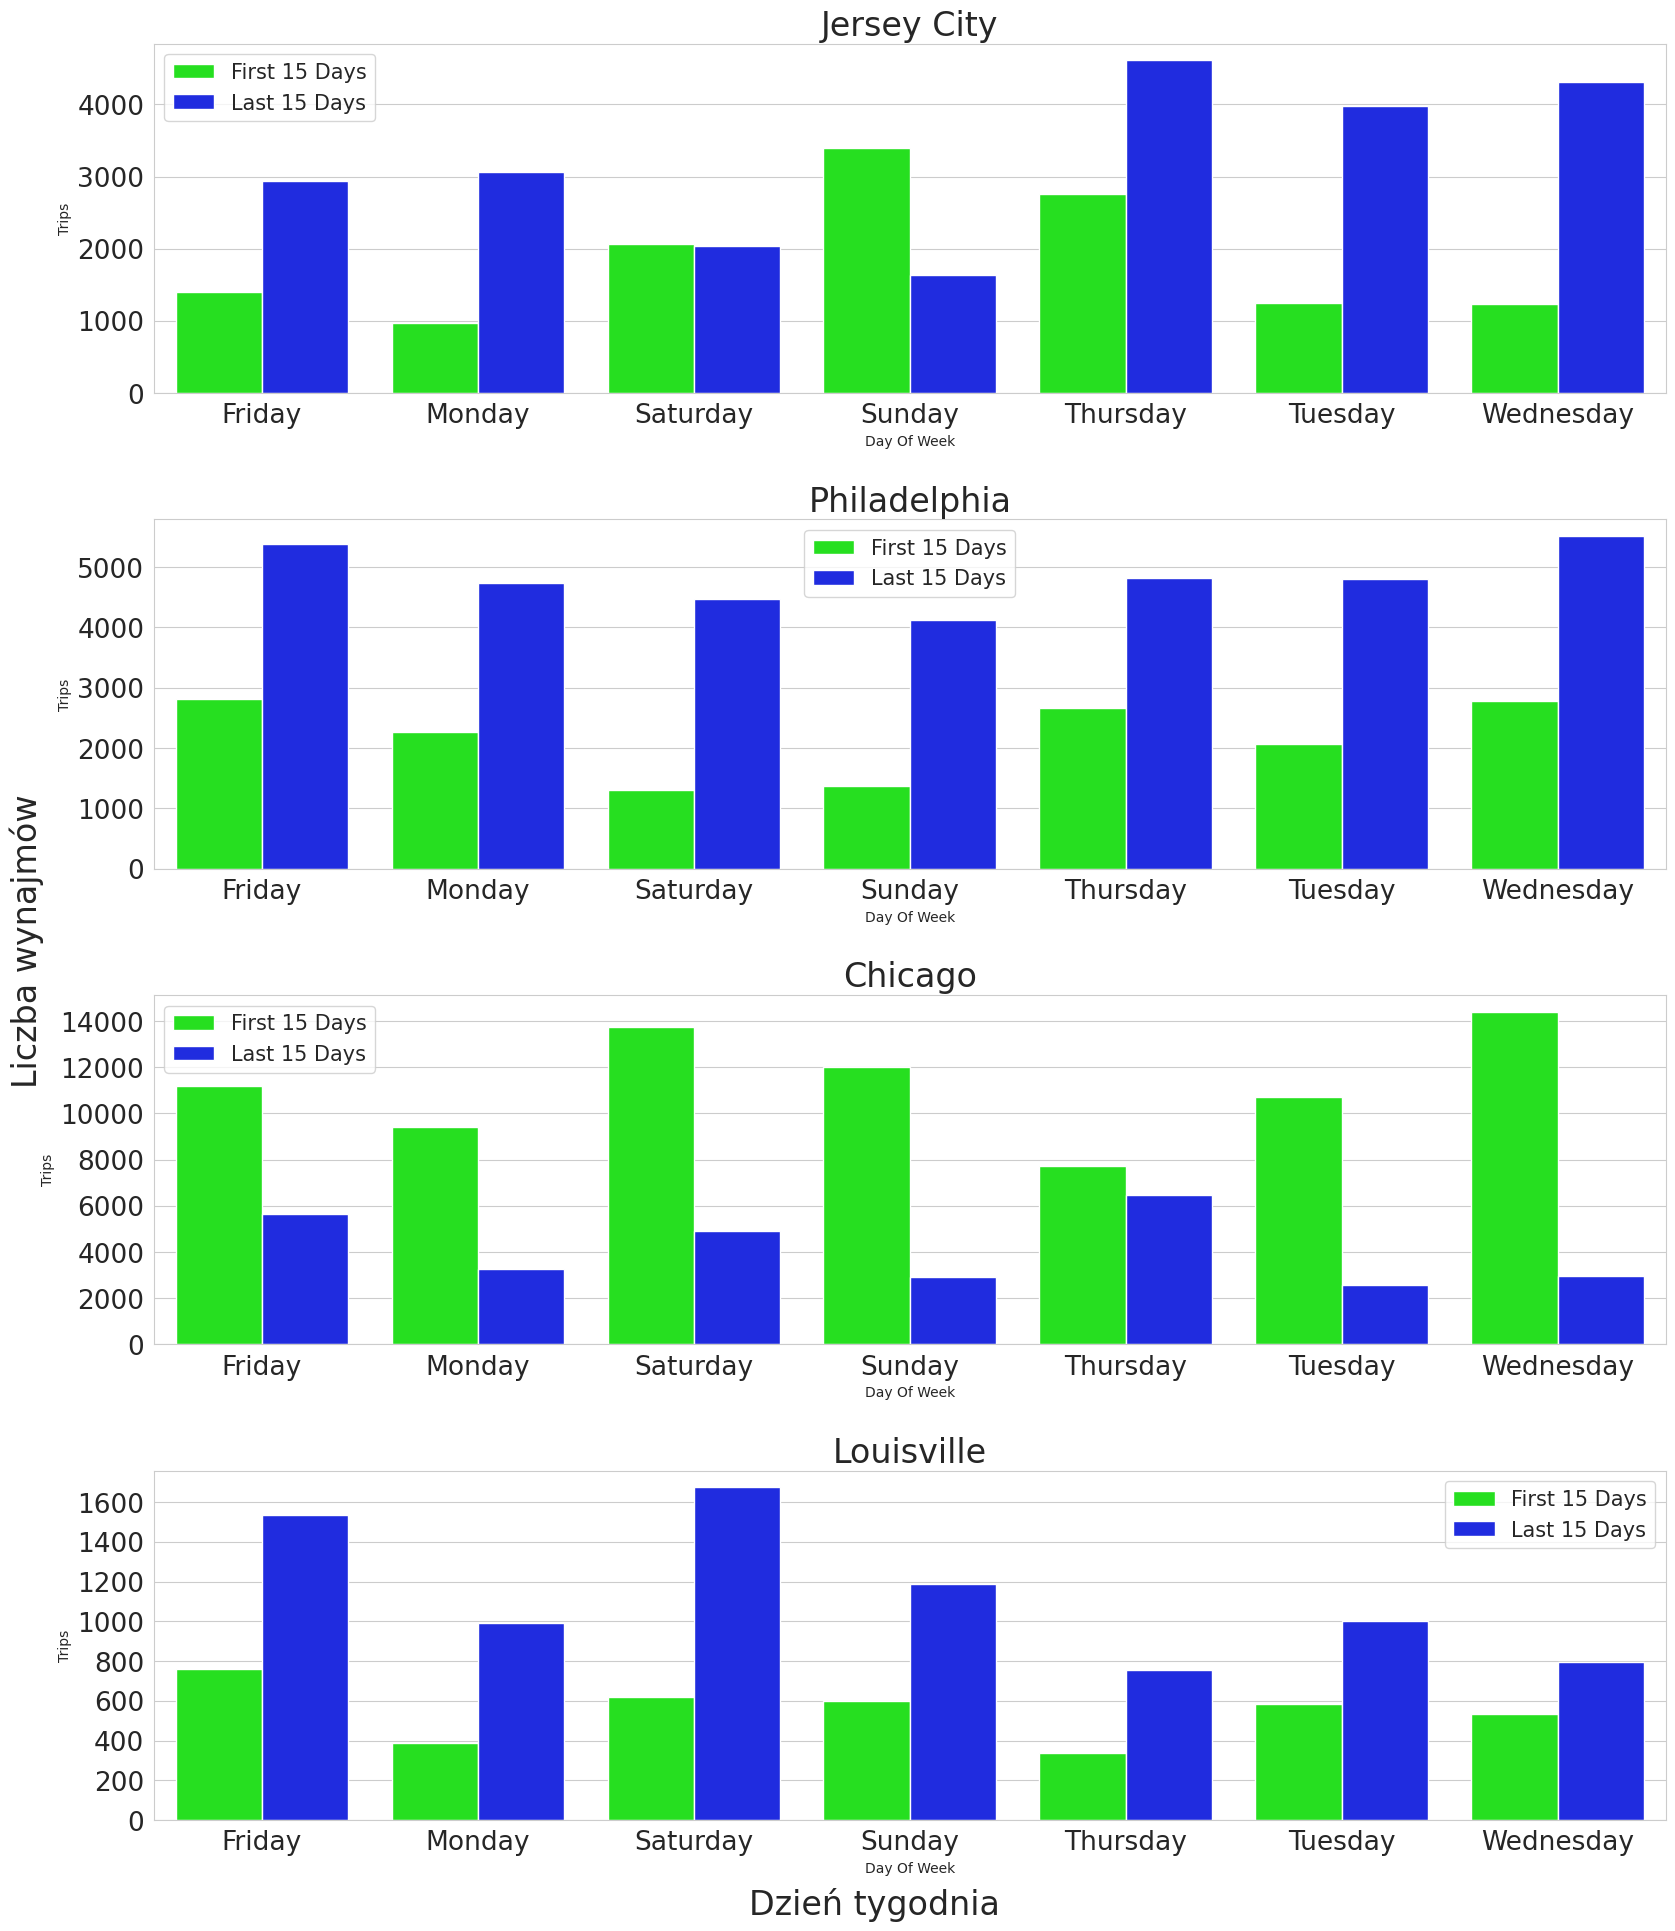

In [22]:
fig, axes = plt.subplots(nrows=4, figsize=(18, 20))
fig.tight_layout(pad = 7.0)
fig.subplots_adjust(left=0.1)
fig.supxlabel("Dzień tygodnia", size = 24)
fig.supylabel("Liczba wynajmów", size = 24)

for ax, fltdg, name in [[axes[0],fltdg_jersey_city, "Jersey City"],
                            [axes[1],fltdg_philadelphia, "Philadelphia"],
                            [axes[2],fltdg_chicago, "Chicago"],
                            [axes[3],fltdg_louisville, "Louisville"]]:


    sns.barplot(x="Day Of Week", y="Trips", hue="Time Period", data=fltdg, palette="hsv", ax=ax)
    plt.title(name, size=24)
    plt.legend(prop={'size': 15})
    plot.set(xlabel=None, ylabel=None)
    ax.set_title(name, size=24)
    ax.legend(prop={'size': 15})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(19)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(19)


In [23]:
fltdh_jersey_city = fltd_jersey_city.groupby(["Hour", "Time Period"])["Time Period"].agg(["count"]).reset_index()
fltdh_jersey_city.columns = ["Hour", "Time Period", "Trips"]

fltdh_philadelphia = fltd_philadelphia.groupby(["hour", "Time Period"])["Time Period"].agg(["count"]).reset_index()
fltdh_philadelphia.columns = ["Hour", "Time Period", "Trips"]

fltdh_chicago = fltd_chicago.groupby(["Hour", "Time Period"])["Time Period"].agg(["count"]).reset_index()
fltdh_chicago.columns = ["Hour", "Time Period", "Trips"]

fltdh_louisville = fltd_louisville.groupby(["Hour", "Time Period"])["Time Period"].agg(["count"]).reset_index()
fltdh_louisville.columns = ["Hour", "Time Period", "Trips"]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


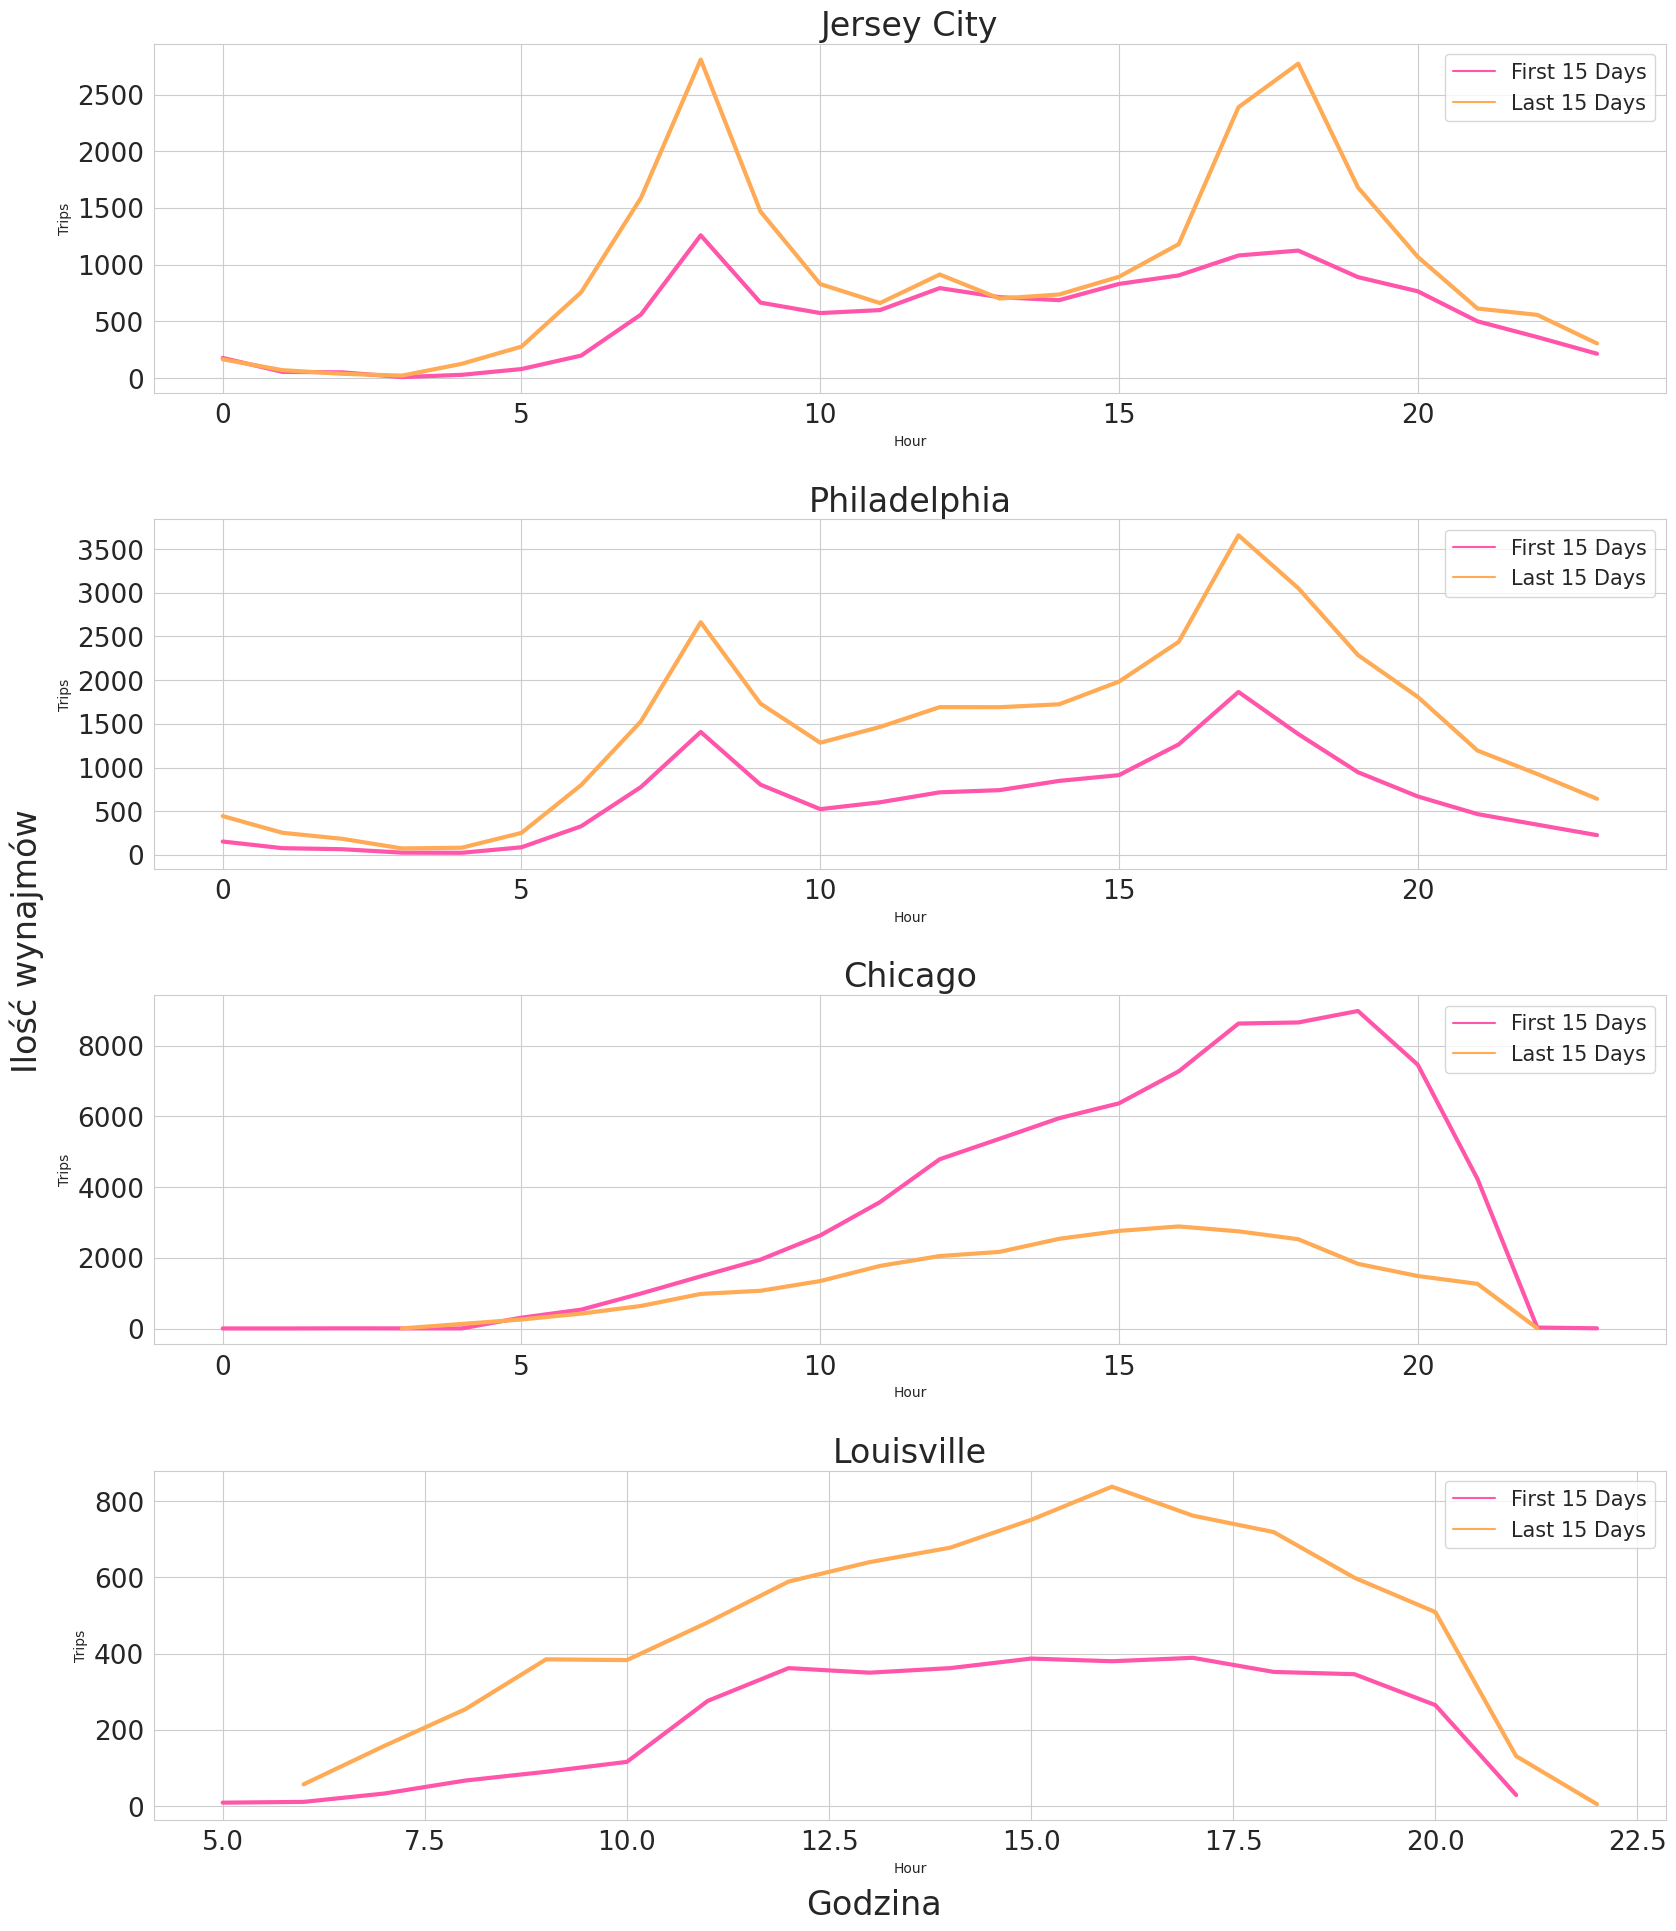

In [24]:
fig, axes = plt.subplots(nrows=4, figsize=(18, 20))
fig.tight_layout(pad = 7.0)
fig.subplots_adjust(left=0.1)
fig.supylabel("Ilość wynajmów", size = 24)
fig.supxlabel("Godzina", size = 24)

for ax, fltdh, name in [[axes[0],fltdh_jersey_city, "Jersey City"],
                            [axes[1],fltdh_philadelphia, "Philadelphia"],
                            [axes[2],fltdh_chicago, "Chicago"],
                            [axes[3],fltdh_louisville, "Louisville"]]:


    sns.lineplot(x="Hour", y="Trips", hue="Time Period", data=fltdh, palette="spring", linewidth=3, ax=ax)

    plt.title(name, size=24)
    plt.legend(prop={'size': 15})
    plot.set(xlabel=None, ylabel=None)
    ax.set_title(name, size=24)
    ax.legend(prop={'size': 15})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(19)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(19)


In [25]:
areas_jersey_city = jersey_city[["Start Station Name", 'End Station Name']].value_counts().to_frame().reset_index()
areas_jersey_city.columns = ["Start Station Name", 'End Station Name', "count"]
same_district_jersey_city = areas_jersey_city[(areas_jersey_city["Start Station Name"] == areas_jersey_city['End Station Name'])].reset_index()
different_district_jersey_city = areas_jersey_city[(areas_jersey_city["Start Station Name"] != areas_jersey_city['End Station Name'])].reset_index()

areas_philadelphia = philadelphia[["start_station_id", 'end_station_id']].value_counts().to_frame().reset_index()
areas_philadelphia.columns = ["start_station_id", 'end_station_id', "count"]
same_district_philadelphia = areas_philadelphia[(areas_philadelphia["start_station_id"] == areas_philadelphia['end_station_id'])].reset_index()
different_district_philadelphia = areas_philadelphia[(areas_philadelphia["start_station_id"] != areas_philadelphia['end_station_id'])].reset_index()

areas_chicago = chicago[["Start Community Area Name", 'End Community Area Name']].value_counts().to_frame().reset_index()
areas_chicago.columns = ["Start Community Area Name", 'End Community Area Name', "count"]
same_district_chicago = areas_chicago[(areas_chicago["Start Community Area Name"] == areas_chicago['End Community Area Name'])].reset_index()
different_district_chicago = areas_chicago[(areas_chicago["Start Community Area Name"] != areas_chicago['End Community Area Name'])].reset_index()


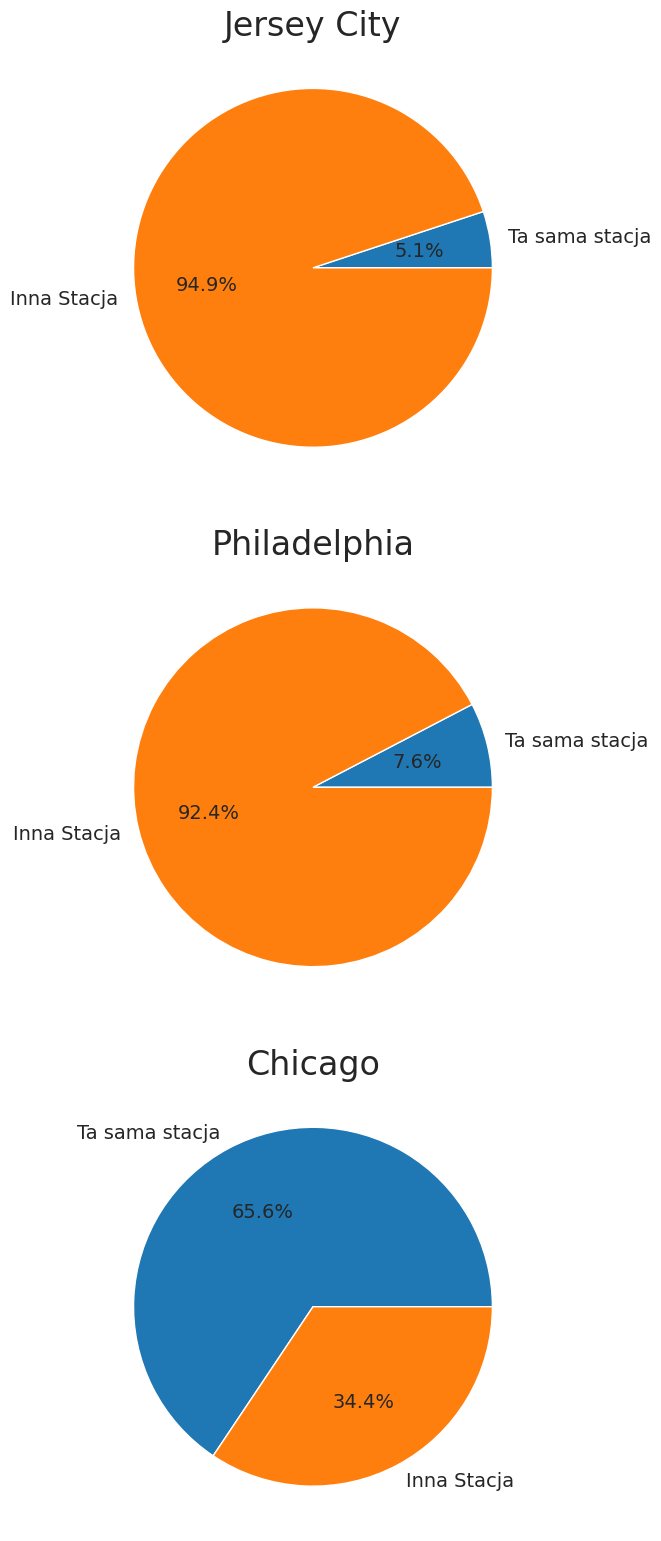

In [40]:
fig, axes = plt.subplots(nrows=3, figsize=(14,16))
fig.tight_layout(pad = 3.0)
fig.subplots_adjust(left=0.1)

for ax, same_district, different_district, name in [[axes[0],same_district_jersey_city,different_district_jersey_city, "Jersey City"],
                            [axes[1],same_district_philadelphia, different_district_philadelphia,"Philadelphia"],
                            [axes[2],same_district_chicago,different_district_chicago, "Chicago"]]:

    plt.rcParams['font.size'] = 14
    ax.pie([same_district["count"].sum(), different_district["count"].sum()],labels=["Ta sama stacja", "Inna Stacja"], autopct='%1.1f%%')
    plt.title(name, size=24)
    plot.set(xlabel=None, ylabel=None)
    ax.set_title(name, size=24)

